<a href="https://colab.research.google.com/github/JMFiore/Data-science-Projects/blob/main/Desision_tree_Income_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 📈🤑Income Predictions🤑📈




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

###Subimos los datos 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path='/content/drive/MyDrive/DataScience/sprint_1/train.csv'
test_path='/content/drive/MyDrive/DataScience/sprint_1/test.csv'

In [ ]:
df=pd.read_csv(train_path,na_values='?',index_col='ID')
test=pd.read_csv(test_path,na_values='?',index_col='ID')

In [ ]:
#df=pd.read_csv(train_path,index_col='ID')
#test=pd.read_csv(test_path,index_col='ID')

In [ ]:
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
ID,,,,,,,,,,,,,,,
24451,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K
985,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K
30229,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K
7107,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
27639,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.shape


(27656, 15)

vamos a remover la columna index que ya venia con el dataset y como index vamos a utilizar la columna ID ya que es la que se utiliza en el archivo que hay que entragar, ademas el ID y el intex anterior coinciden en algunos y en otros no por lo tanto para evitar confusiones se lo remueve.
Por otro lado vamos a realizar el analisis de datatos y ver que desicion se puede tomar con respecto a los valores faltantes mas adelante.

In [ ]:
df=df.drop(columns='index')

In [ ]:
test=test.drop(columns='index')

###Evaluacion de los NaNs

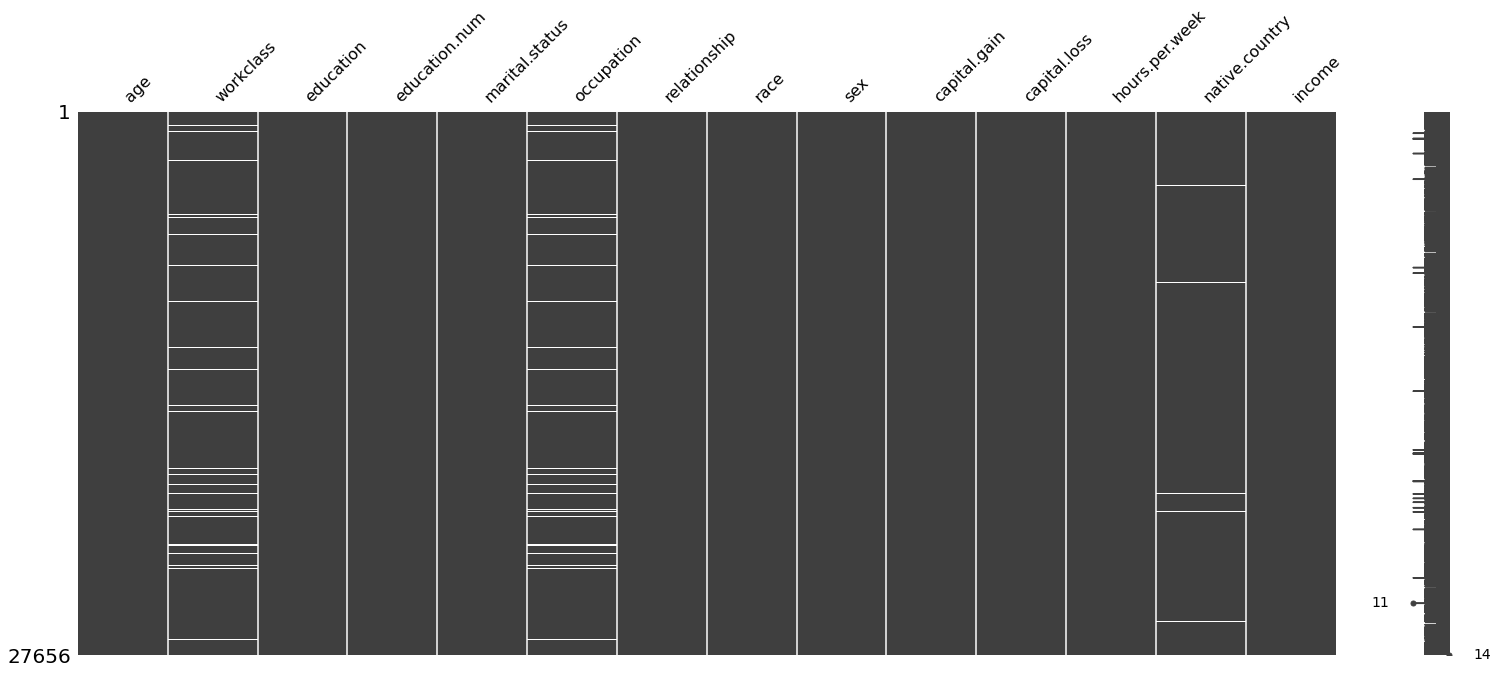

In [ ]:
msno.matrix(df)

In [ ]:
df.isna().sum()

age                  0
workclass         1539
education            0
education.num        0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     504
income               0
dtype: int64

In [ ]:
print(f'-->% de los datos faltantes en workClass:{round((df.workclass.isna().sum()/df.shape[0])*100,2)}')
print(f'-->% de los datos faltantes en occupation:{round((df.occupation.isna().sum()/df.shape[0])*100,2)}')
a=df['native.country'].isna().sum()
print(f'-->% de los datos faltantes en native.country:{round((a/df.shape[0])*100,2)}')

-->% de los datos faltantes en workClass:5.56
-->% de los datos faltantes en occupation:5.59
-->% de los datos faltantes en native.country:1.82


In [ ]:
df['native.country'].isna().sum()

504

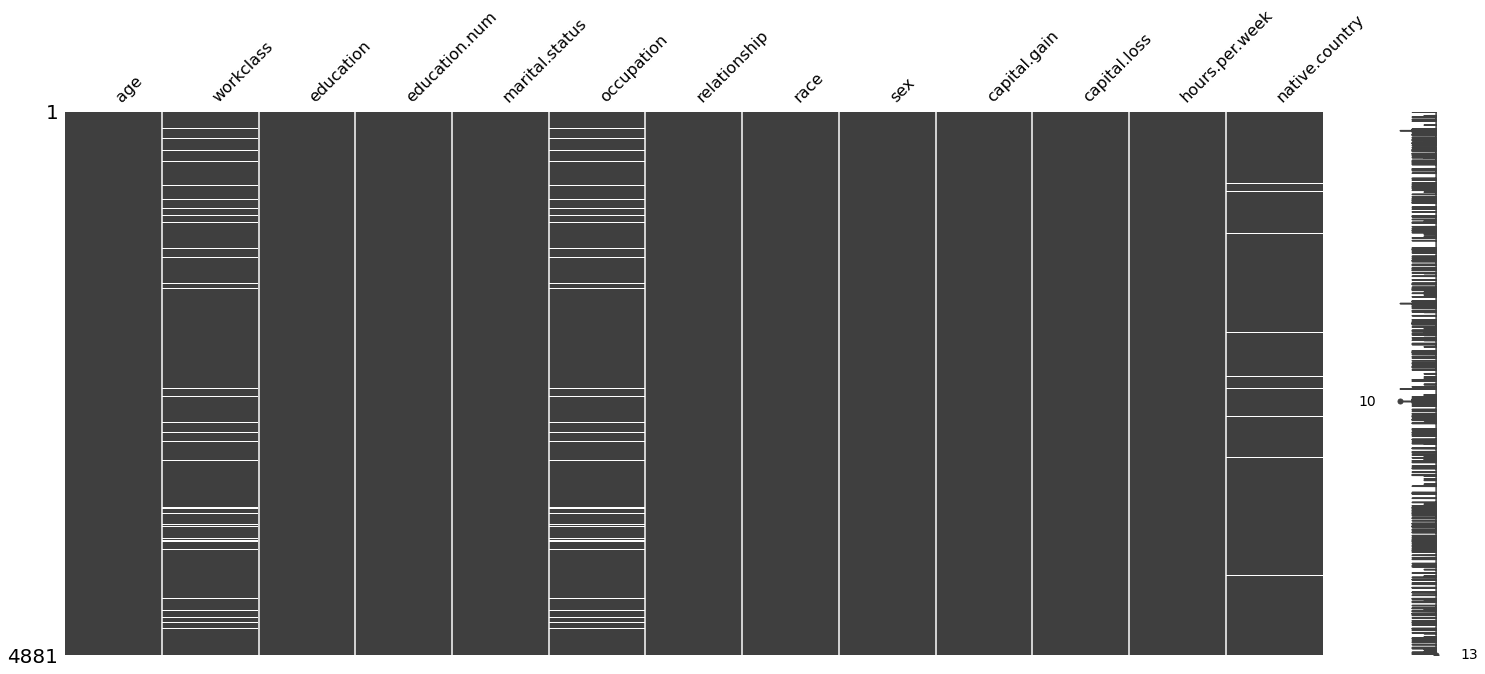

In [ ]:
msno.matrix(test)

In [ ]:
print(f'-->% de los datos faltantes en workClass:{round((test.workclass.isna().sum()/test.shape[0])*100,2)}')
print(f'-->% de los datos faltantes en occupation:{round((test.occupation.isna().sum()/test.shape[0])*100,2)}')
b=test['native.country'].isna().sum()
print(f'-->% de los datos faltantes en native.country:{round((b/test.shape[0])*100,2)}')

-->% de los datos faltantes en workClass:6.08
-->% de los datos faltantes en occupation:6.08
-->% de los datos faltantes en native.country:1.6


In [ ]:
test.isna().sum()

age                 0
workclass         297
education           0
education.num       0
marital.status      0
occupation        297
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country     78
dtype: int64

Por lo que podemos ver faltan datos principalmente en dos columnas WorkClass y occupation. Tambien en native.county en menor medida. Esto se repite para ambos dataframes. 

Por lo que se puede ver en el grafico pareciera que los valores fatantes son de las mismas filas.

Al tener datos faltantes en test vamos a tener que encontrar una forma de imputar los nan o de tratarlos, ya que si los eliminamos tendrimas al menos un 6% menos de performance, limitandonos a un maximo de 94%.



###Tipos de variables

Nombre columna| Tipo de dato |Significado
---|---|---
age|Numerico discreto|Edad
workclass|Categorico| Sector de trabajo 
education|Categorico|Tipo de titulo 
education.num|Numerico discreto|relacionado con education 
marital.status|Categorico|Estado civil
occupation|Categorico|trabajo-oficio
relationship|Categorico| Familiares a cargo
race|Categorico|Raza
sex|Categorico|Genero
capital.gain|Numerico discreto|
capital.loss|Numerico discreto
hours.per.week|Numerico continuo|horas x semana 
native.country|Categorico|Pais de nacimento
Income|Categorco|mayor o menor a 50k


In [ ]:
# vamos a ver si se corresponden en el dataframe 
df.dtypes

age                int64
workclass         object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

## Variable Respuesta

In [ ]:
df.income.value_counts(normalize=True)*100

<=50K    75.762945
>50K     24.237055
Name: income, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


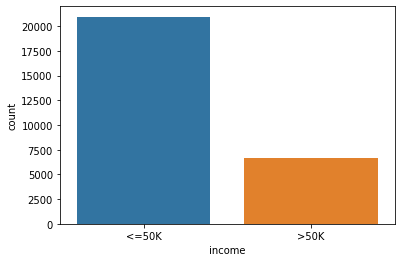

In [ ]:
sns.countplot(df.income)

Tenemos un desbalance de los datos vemos que para mas de 50k es un 24% y para menos de 50k es un 75%. 

##Variables categoricas

In [ ]:
#Cantidad de categorias por cada variable y tipos de categorias.
categorical = df.select_dtypes(['category', 'object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, df[col].nunique()))
    
print('\n-------------\n')

for col in categorical:
    print('{} : {}'.format(col, ', '.join(df.dropna()[col].unique())))

workclass : 8 unique value(s)
education : 16 unique value(s)
marital.status : 7 unique value(s)
occupation : 14 unique value(s)
relationship : 6 unique value(s)
race : 5 unique value(s)
sex : 2 unique value(s)
native.country : 41 unique value(s)
income : 2 unique value(s)

-------------

workclass : Local-gov, Private, Federal-gov, Self-emp-not-inc, State-gov, Self-emp-inc, Without-pay
education : HS-grad, Bachelors, Some-college, 7th-8th, Assoc-voc, Masters, Assoc-acdm, 1st-4th, Prof-school, 9th, 10th, 11th, 5th-6th, 12th, Doctorate, Preschool
marital.status : Divorced, Married-civ-spouse, Never-married, Widowed, Separated, Married-spouse-absent, Married-AF-spouse
occupation : Protective-serv, Exec-managerial, Craft-repair, Prof-specialty, Tech-support, Other-service, Transport-moving, Adm-clerical, Farming-fishing, Handlers-cleaners, Sales, Machine-op-inspct, Priv-house-serv, Armed-Forces
relationship : Own-child, Wife, Husband, Not-in-family, Unmarried, Other-relative
race : White, 

###Work class & Education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


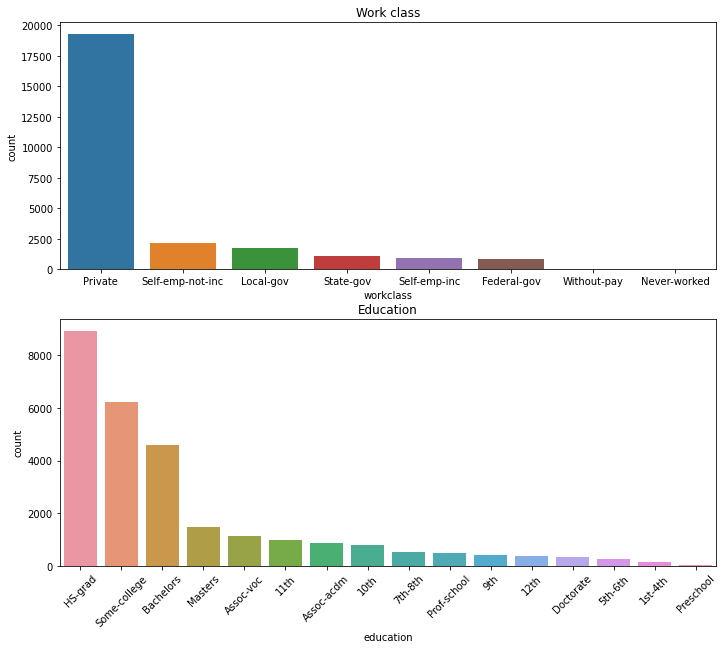

In [ ]:
#@title 

plt.figure(figsize=(40,10))
plt.subplot(231)
plt.title('Work class')
sns.countplot(df.workclass,order=df.workclass.value_counts(ascending=False).index)

plt.subplot(234)
plt.title('Education')
sns.countplot(df.education,order=df.education.value_counts(ascending=False).index)
plt.xticks(rotation=45)

plt.show()


In [ ]:
df.workclass.value_counts(normalize=True)*100

Private             73.817820
Self-emp-not-inc     8.255159
Local-gov            6.773366
State-gov            4.276908
Self-emp-inc         3.648964
Federal-gov          3.147375
Without-pay          0.053605
Never-worked         0.026802
Name: workclass, dtype: float64

In [ ]:
privados_por=len(df.loc[df.workclass.isin(['Private','Self-emp-not-inc','Self-emp-inc'])].workclass)/df.shape[0]*100
publicos_por=len(df.loc[df.workclass.isin(['Local-gov','State-gov','Federal-gov'])].workclass)/df.shape[0]*100

In [ ]:
df.education.value_counts()

HS-grad         8934
Some-college    6223
Bachelors       4583
Masters         1474
Assoc-voc       1147
11th             982
Assoc-acdm       886
10th             794
7th-8th          535
Prof-school      495
9th              429
12th             365
Doctorate        352
5th-6th          275
1st-4th          139
Preschool         43
Name: education, dtype: int64

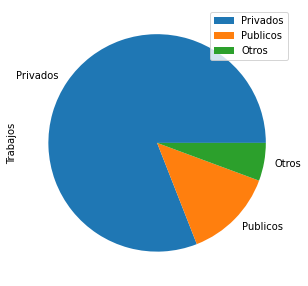

In [ ]:
# pie plot tipo de tabajos
lm=pd.DataFrame({'Trabajos':[privados_por,publicos_por,100-(privados_por+publicos_por)]}, index=['Privados','Publicos','Otros'])
plot = lm.plot.pie(y='Trabajos', figsize=(5, 5))

In [ ]:
print(f'El porcentaje de empleados en el sector privado es : {round(privados_por,2)}%')
print(f'El porcentaje de empleados en el sector privado es : {round(publicos_por,2)}%')
print("El 6% que falta son nan's y otros tipos de trabajos")

El porcentaje de empleados en el sector privado es : 80.95%
El porcentaje de empleados en el sector privado es : 13.41%
El 6% que falta son nan's y otros tipos de trabajos


In [ ]:
#@title Calculos
uni=len(df.loc[df.education.isin(['Bachelors','Masters','Assoc-acdm','Doctorate'])].education)/df.shape[0]*100
pasaronHS=len(df.loc[df.education.isin(['HS-grad','Prof-school','Some-college'])].education)/df.shape[0]*100
print(f'El porcentaje de Universitarios : {round(uni,2)} %')
print(f'El porcentaje de graduados de secundaria : {round(pasaronHS,2)} %')
print(f"El porcentaje de no graduados : {round(100-(pasaronHS+uni))} %")

El porcentaje de Universitarios : 26.38 %
El porcentaje de graduados de secundaria : 56.6 %
El porcentaje de no graduados : 17 %


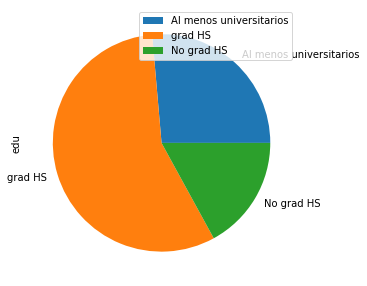

In [ ]:
la=pd.DataFrame({'edu':[uni,pasaronHS,100-(pasaronHS+uni)]},index=['Al menos universitarios','grad HS','No grad HS'])
plot = la.plot.pie(y='edu', figsize=(5, 5))

In [ ]:
# Porcentaje de personas que poseen titulo o cursaron la uni  en el sector privado
unipri=len(df.loc[df.education.isin(['Bachelors','Masters','Assoc-acdm','Doctorate']) & df.workclass.isin(['Private','Self-emp-not-inc','Self-emp-inc'])])/df.shape[0]*100

In [ ]:
#@title Calculos
# Porcentaje de personas que poseen titulo o cursaron la uni  en el sector publico
unipub=len(df.loc[df.education.isin(['Bachelors','Masters','Assoc-acdm','Doctorate'])& df.workclass.isin(['Local-gov','State-gov','Federal-gov'])])/df.shape[0]*100

sintitpriv=len(df.loc[df.education.isin(['HS-grad','11th','10th','7th-8th','9th','12th','5th-6th','1st-4th','Preschool','Prof-school','Some-college'])& df.workclass.isin(['Private','Self-emp-not-inc','Self-emp-inc'])])/df.shape[0]*100

sintitpub=len(df.loc[df.education.isin(['HS-grad','11th','10th','7th-8th','9th','12th','5th-6th','1st-4th','Preschool','Prof-school','Some-college'])& df.workclass.isin(['Local-gov','State-gov','Federal-gov'])])/df.shape[0]*100

print(f'El porcentaje de personas con titulo universitario que trabajan en el sector privado {round(unipri,2)} %')
print(f'El porcentaje de personas hasta secundario que trabajan en el sector privado         {round(sintitpriv,2)} %')
print(f'El porcentaje de personas con titulo universitario que trabajan en el sector publico {round(unipub,2)} %')
print(f'El porcentaje de personas hasta secundario que trabajan en el sector publico         {round(sintitpub,2)} %')


El porcentaje de personas con titulo universitario que trabajan en el sector privado 19.76 %
El porcentaje de personas hasta secundario que trabajan en el sector privado         57.74 %
El porcentaje de personas con titulo universitario que trabajan en el sector publico 5.74 %
El porcentaje de personas hasta secundario que trabajan en el sector publico         7.16 %


Resumen

* El mayor generador de empleos es el sector privado con el 80.95% luego le sigue el sector publico con el 13.4% y otros.


*  Gran parte de la poblacion, 48.8% para ser mas exactos fue a la univarsidad,pero solo el 26,38% termino con titulo, el resto 56.6 % termino el secundario y el 17% no llego a terminar el secundario.


*  el secor privado esta caracterizado por un 19.76% de personas que poseen titulo , 57.74% de personas que no poseen titulo.

* El sector publico posee un 5.74% de personas con titulo y un 7.16% de personas sin tutulo.

* En proporcion el secotor privado posee mas personas que tienen un titulo, a comparacion del sector privado donde la mayoria son personas sin titulo.





####Comparacion con la variable respuesta

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

<Figure size 1080x720 with 0 Axes>

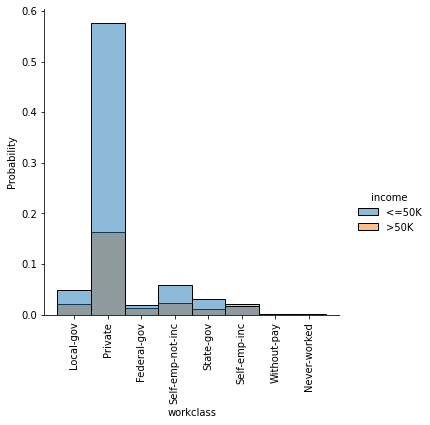

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(df, x="workclass", hue="income", stat="probability",)
plt.xticks(rotation=90)

Se puede observar que en cuanto al sector privado es el que mayor numero de personas posee y eu que mas sueldo de menos de 50k se gana al anio.
En cunato a autoempleado incorporad oa una empresa son los que mayor proporcion de mas de 50k ganan.
Por ultimo en el sector publico podemos ver que cuanto mas abajo mas gente hay menores las chanses de que el sueldo de mayor a 50k , a medida que va subiendo de gerarquia tenemos menos gente con una mayor proporcion de gente que gana mas de 50k. 

Aca podemos ver que hay una mayor proporcion de perosnas que ganan mas de 50k en el sector privado.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

<Figure size 1080x720 with 0 Axes>

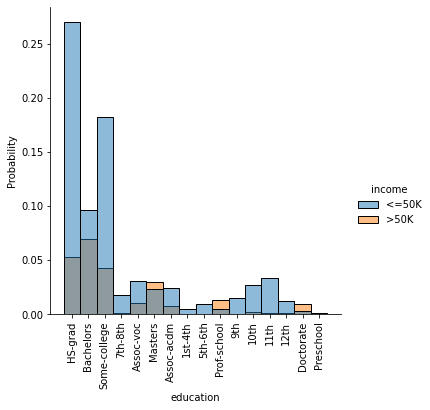

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(df, x="education", hue="income", stat="probability",)
plt.xticks(rotation=90)

Se observa que las mientras mas alto el titulo mayores son las chanse de botener sueldos de 50k , como Masters , Prof-school, Doctorate. Mientras que personas con titulos menores la probabilidad decrece y es casinula en personas con titulos menores al secundario.

###Marital status & Occupation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


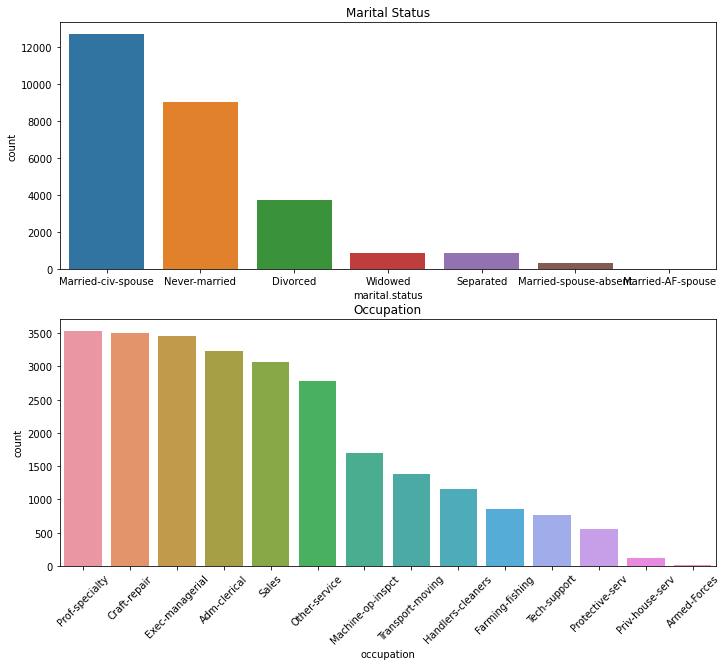

In [ ]:

plt.figure(figsize=(40,10))
plt.subplot(231)
plt.title('Marital Status')
sns.countplot(df['marital.status'],order=df['marital.status'].value_counts(ascending=False).index)

plt.subplot(234)
plt.title('Occupation')
sns.countplot(df.occupation,order=df.occupation.value_counts(ascending=False).index)
plt.xticks(rotation=45)

plt.show()


In [ ]:
print(f"{df['marital.status'].value_counts(ascending=False,normalize=True)*100} tenemos que los tres estados mas comunes son casado-civil, Nunca casado, Divorciado,\nestos explican el 93% de los casos.")

Married-civ-spouse       45.993636
Never-married            32.777697
Divorced                 13.631762
Widowed                   3.098785
Separated                 3.098785
Married-spouse-absent     1.323402
Married-AF-spouse         0.075933
Name: marital.status, dtype: float64 tenemos que los tres estados mas comunes son casado-civil, Nunca casado, Divorciado,
estos explican el 93% de los casos.


In [ ]:
print(f'Los 7 trabajos mas realizados son : \n\n{(df.occupation.value_counts(ascending=False, normalize=True)*100)[:7]}\nEstos comparten casi la misma proporcion.')

Los 7 trabajos mas realizados son : 

Prof-specialty       13.554194
Craft-repair         13.439295
Exec-managerial      13.213328
Adm-clerical         12.397549
Sales                11.738797
Other-service        10.624282
Machine-op-inspct     6.480276
Name: occupation, dtype: float64
Estos comparten casi la misma proporcion.


In [ ]:
marriedpriv=len(df.loc[df['marital.status'].isin(['Married-civ-spouse']) & df.workclass.isin(['Private','Self-emp-not-inc','Self-emp-inc'])])/df.loc[df['marital.status'].isin(['Married-civ-spouse'])].shape[0]*100
neverpriv=len(df.loc[df['marital.status'].isin(['Never-married']) & df.workclass.isin(['Private','Self-emp-not-inc','Self-emp-inc'])])/df.loc[df['marital.status'].isin(['Never-married'])].shape[0]*100
divpriv=len(df.loc[df['marital.status'].isin(['Divorced']) & df.workclass.isin(['Private','Self-emp-not-inc','Self-emp-inc'])])/df.loc[df['marital.status'].isin(['Divorced'])].shape[0]*100

In [ ]:
marriedpub=len(df.loc[df['marital.status'].isin(['Married-civ-spouse']) & df.workclass.isin(['Local-gov','State-gov','Federal-gov'])])/df.loc[df['marital.status'].isin(['Married-civ-spouse'])].shape[0]*100
neverpub=len(df.loc[df['marital.status'].isin(['Never-married']) & df.workclass.isin(['Local-gov','State-gov','Federal-gov'])])/df.loc[df['marital.status'].isin(['Never-married'])].shape[0]*100
divpub=len(df.loc[df['marital.status'].isin(['Divorced']) & df.workclass.isin(['Local-gov','State-gov','Federal-gov'])])/df.loc[df['marital.status'].isin(['Divorced'])].shape[0]*100

In [ ]:
print(f'El porcentaje de casados en el sector privado es {round(marriedpriv,2)}')
print(f'El porcentaje de solteros en el sector privado es {round(neverpriv,2)}')
print(f'El porcentaje de divorciados en el sector privado es {round(divpriv,2)}')
print(f'El porcentaje de casados en el sector publico es {round(marriedpub,2)}')
print(f'El porcentaje de solteros en el sector publico es {round(neverpub,2)}')
print(f'El porcentaje de divorciados en el sector publico es {round(divpub,2)}')


El porcentaje de casados en el sector privado es 81.74
El porcentaje de solteros en el sector privado es 81.81
El porcentaje de divorciados en el sector privado es 79.02
El porcentaje de casados en el sector publico es 13.97
El porcentaje de solteros en el sector publico es 11.09
El porcentaje de divorciados en el sector publico es 16.92


En la variable estado civil encontramos que hay 4 categorias predominantes, casado, soltero, divorciado, separado. y que estas categorias se encuantran en igual proporcion en los sectores tanto publicos como privados. Por lo tanto se podria decir que al sector en el que se trabaje no condiciona el estado civil.
En la variable ocupacion se ve que esta distribuida de forma mas uniforme entre las principles categorias. 

####Comparacion con la variable respuesta

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

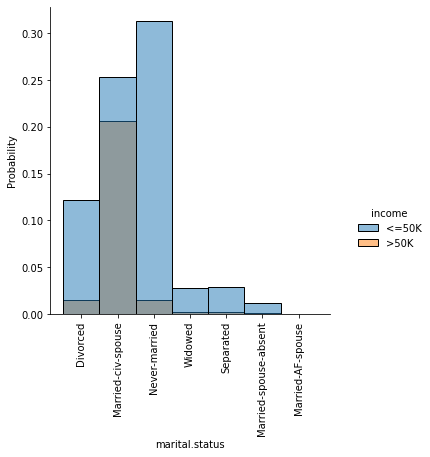

In [ ]:
sns.displot(df, x="marital.status", hue="income", stat="probability",)
plt.xticks(rotation=90)

Encontramos que las personas casadas poseen mayores chances de tener un ingreso superior 50k que el resto de los estados civiles. En el caso de solteros encontramos que muy pocos llegan a 50k.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


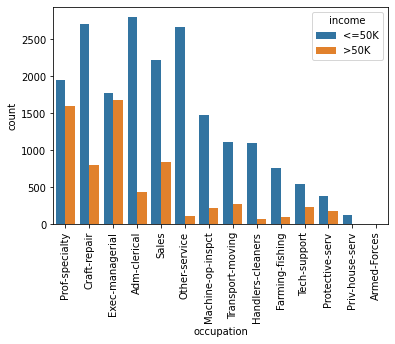

In [ ]:
#@title 
sns.countplot(df["occupation"], hue=df["income"],order=df.occupation.value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.show()


se puede observar que dentro de las 7 labores con mayor numero de gente, las que en general poseen un salario superior a 50k son: 

*   prof-speciality
*   executive manager
*  Sales

. 

###Relationship & Race

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


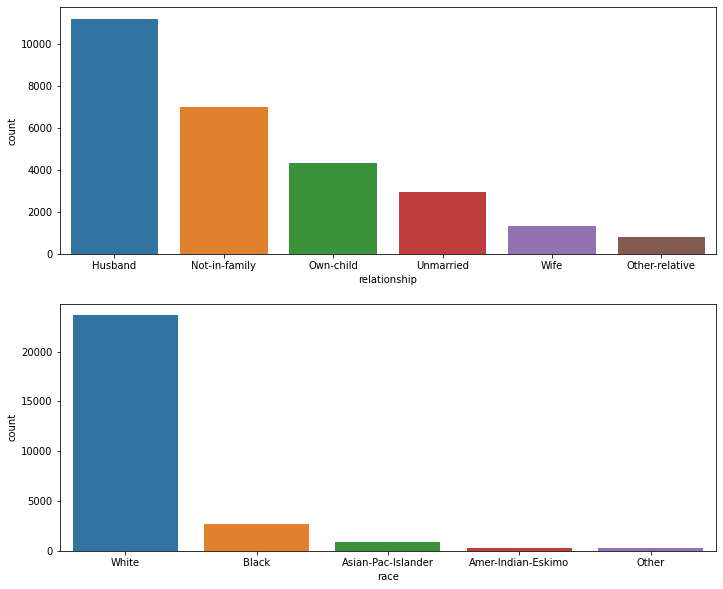

In [ ]:
#@title 
plt.figure(figsize=(40,10))
plt.subplot(231)
sns.countplot(df['relationship'], order=df.relationship.value_counts(ascending=False).index)

plt.subplot(234)
sns.countplot(df['race'], order=df.race.value_counts(ascending=False).index)

plt.show()

Como podemos ver en el grafico tenemos una predominacia de hombres casados, segudo por un segmento de personas sin familia , luego con hijos y por ultimo una pequeña porcion de esposas.
Al mismo tiempo estas son personas en su mayoria blancas y menos de un 10% negras.
Es decir este data set por lo que podemos ver esta sesgado casi a hombres blacos, con un estado civil casado o soltero y luego tenemos las minorias que son el los grupos sociales menos encuestados,como mujeres, otras personas de color de piel,etc.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

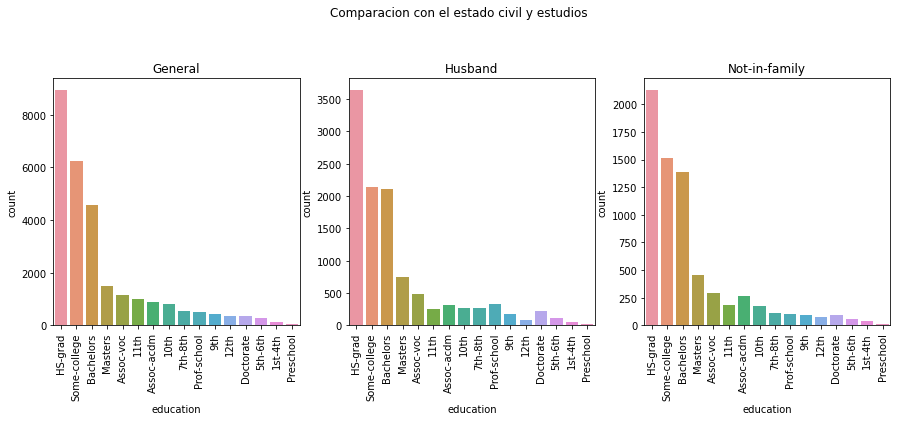

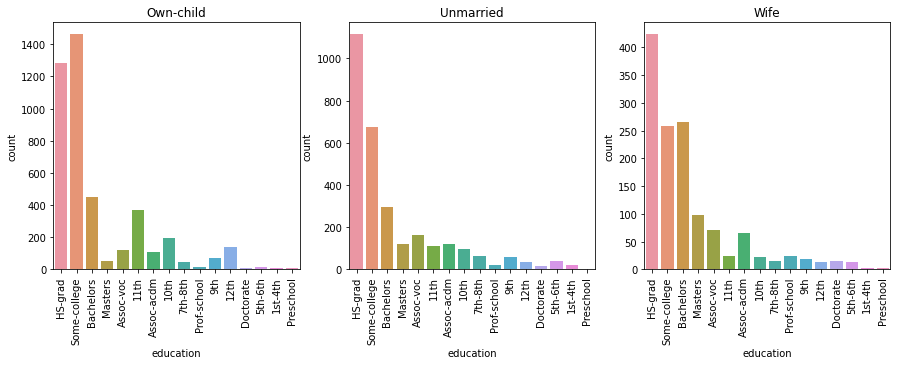

In [ ]:
#@title 
#@title 
plt.figure(figsize=(15,10))
plt.suptitle('Comparacion con el estado civil y estudios')
plt.subplot(231)
plt.title('General')
sns.countplot(df.education ,order=df.education.value_counts().index)
plt.xticks(rotation=90)

plt.subplot(232)
plt.title('Husband')
sns.countplot(df[df.relationship=='Husband'].education ,order=df.education.value_counts().index)
plt.xticks(rotation=90)

plt.subplot(233)
plt.title('Not-in-family')
sns.countplot(df[df.relationship=='Not-in-family'].education ,order=df.education.value_counts().index)
plt.xticks(rotation=90)

plt.figure(figsize=(15,10))

plt.subplot(234)
plt.title('Own-child')
sns.countplot(df[df.relationship=='Own-child'].education ,order=df.education.value_counts().index)
plt.xticks(rotation=90)

plt.subplot(235)
plt.title('Unmarried')
sns.countplot(df[df.relationship=='Unmarried'].education ,order=df.education.value_counts().index)
plt.xticks(rotation=90)

plt.subplot(236)
plt.title('Wife')
sns.countplot(df[df.relationship=='Wife'].education ,order=df.education.value_counts().index)
plt.xticks(rotation=90)

plt.show()



En esta comparacion se puede evaluar un poco con los estudios generales del data frame se parecen bastante alos de Husband ya que son la mayoria de las personas registradas , esta categoria regista la mayor proporcion en doctorados. Cuando comparamos con la situacion de Own-child vemos que hay gran proporcion de personas que copletaron el secundario y tambien gran cantidad de personas que hicieron algo de la universidad pero no llegaron a concluirla, tambien vemos que es la categoria que mayor proporcion de 10th, 11th y 12th hay. y la que menos bachelors , masters , doctorados posee.
Por ultimo la categoria Wife posee una proporion mayor que el resto de assoc-acadm , esto es un titulo que se obtiene por realizar una iniciacion de 2 años en la universidad y que te prepara para la carrera  mas adelante.Ademas es la unica categoria que posee mayor proporcion de bachelors que de some-college.

####Comparacion con la variable respuesta

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


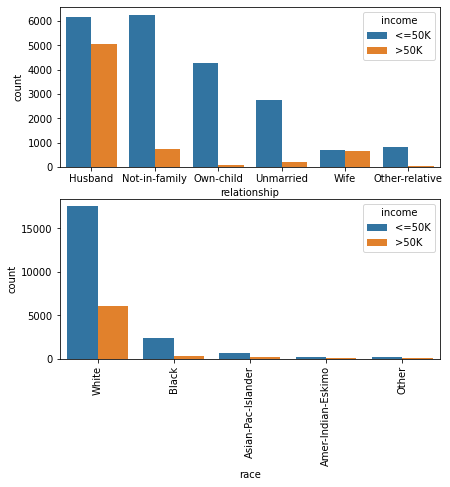

In [ ]:
#@title 
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.countplot(df.relationship, hue=df.income,order=df.relationship.value_counts(ascending=False).index)

plt.subplot(323)
sns.countplot(df.race, hue=df.income, order=df.race.value_counts(ascending=False).index)
plt.xticks(rotation=90)

plt.show()

En el grafico de arriba se observa  que la categoria husband y wife poseen las mismas proporciones en cunato a salarios,como lo veiamos en el estado civil las parejas casadas poseen salarios mayores esto tambien se puede var en los titulos que poseen, vimos que esposos y esposas tiene una tendencia mayora aposeer titulos mas relevantes que les permiten accedar a trabajos con mayores salarios.Por otro lado tenemos a la clase con hijos en la que la proporcion de salarios por arriba de los 50k es muy baja con respecto a la proporcion por debajo de los 50k y tambien se pueda comprobar en el tipo de educacion que esta clase obtubo. 

###Sex & native.country

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

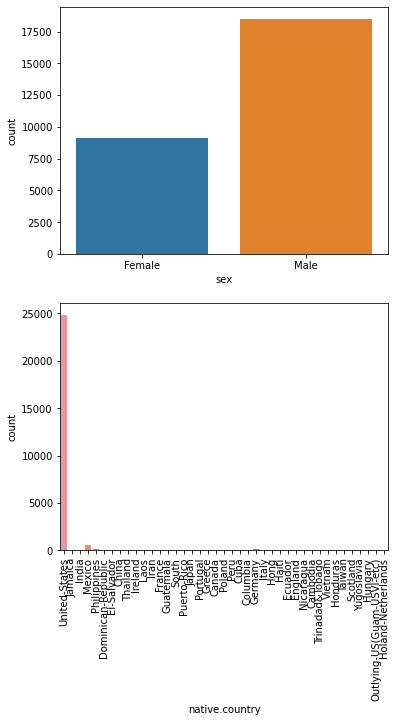

In [ ]:
#@title 
plt.figure(figsize=(20,10))

plt.subplot(231)
sns.countplot(df.sex)

plt.subplot(234)
sns.countplot(df['native.country'])
plt.xticks(rotation=90)

In [ ]:
df['native.country'].value_counts(normalize=True)*100

United-States                 91.378167
Mexico                         1.959340
Philippines                    0.615056
Germany                        0.397761
Canada                         0.357248
Puerto-Rico                    0.346199
El-Salvador                    0.346199
India                          0.309369
England                        0.287272
Cuba                           0.283589
Jamaica                        0.265174
China                          0.239393
South                          0.235710
Dominican-Republic             0.235710
Italy                          0.224661
Japan                          0.206246
Vietnam                        0.206246
Poland                         0.176783
Columbia                       0.169417
Guatemala                      0.162051
Haiti                          0.151002
Taiwan                         0.147319
Iran                           0.139953
Portugal                       0.128904
Nicaragua                      0.117855


In [ ]:
df.sex.value_counts(normalize=True)*100

Male      66.969193
Female    33.030807
Name: sex, dtype: float64

Native country no pareciera ser relevante ya que el 91% del dataframe es de estados unidos y luego se divide en 40 paises con menos del 0,05% por lo tanto a fines de simplificar el modelo y debido a los datos faltantes que tiene esta colimna es preferible retirarla. 

Por otro lado como veiamos en las categorias de razas y estados civil tenemos una predominancia de hombres en un 67% con respecto a mujeres un 33%

####Comparacion con la variable respuesta

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


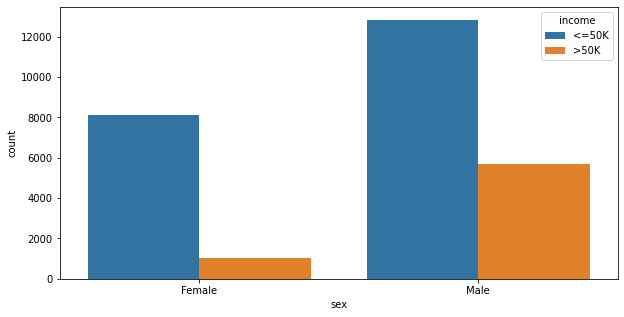

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(df.sex, hue=df.income)

Encontramos que alrededor de 1/3 de los hombres ganan mas de 50k , en cambio en las mujeres esa relacion baja alrededor de 1/7. Esto es interesante ya que en los graficos anteriores veiamos que Wife teina incluso una proporcion aun mayor que husban en salarios superiores a 50k.

##Variables Numericas

In [ ]:
df.head(15)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
ID,,,,,,,,,,,,,,
24451,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K
985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K
30229,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K
7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
27639,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
18126,32,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
26809,31,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32111,59,Federal-gov,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
2566,57,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States,>50K


###Age

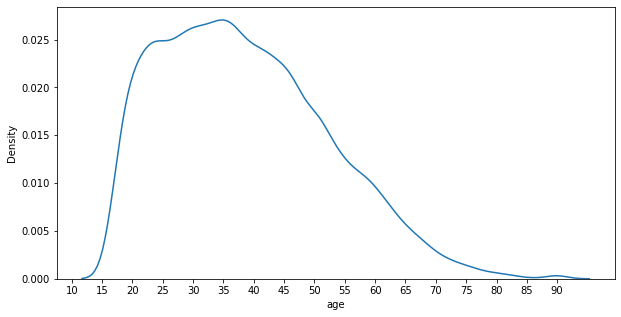

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.age)
plt.xticks([10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
plt.show()

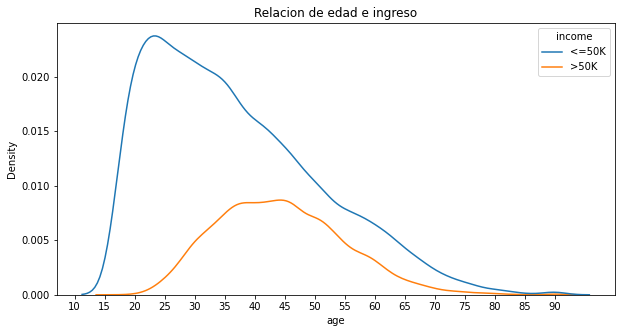

In [ ]:

plt.figure(figsize=(10,5))
plt.title('Relacion de edad e ingreso')
sns.kdeplot(df.age, hue=df.income)
plt.xticks([10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
plt.show()

Este grafico es interesante ya que vemos que gran parte del dataframe pertenece a edades tempranas , alrededor de los 20, donde dificilmente se obtenga un salario superior a 50k, y mentras nos vamos a deades mayores los sueldos se van incrementando.  
Seria importatne categorizar es ta variable ya que como dijimos antes a mediad que la edad es mayor la relacion de salarios tambien cambia.

###Capital

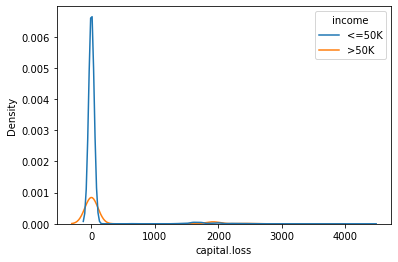

In [ ]:
sns.kdeplot(df['capital.loss'], hue=df.income)

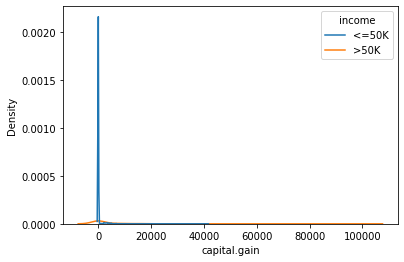

In [ ]:
 sns.kdeplot(df['capital.gain'], hue=df.income)

A gran escala pareciera que no nos aporta nada de informacion , pero que pasa si empezamos a amplificar....

([<matplotlib.axis.XTick at 0x7f6592d89d90>,
 <a list of 4 Text major ticklabel objects>)

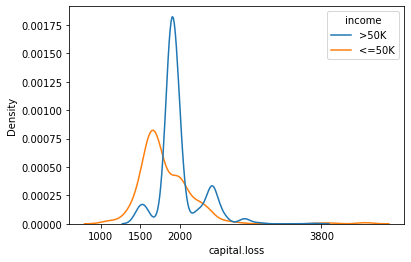

In [ ]:
sns.kdeplot(x=df.loc[df['capital.loss']>1000]['capital.loss'],hue=df.loc[df['capital.loss']>1000].income)
plt.xticks([1000,1500,2000,3800])

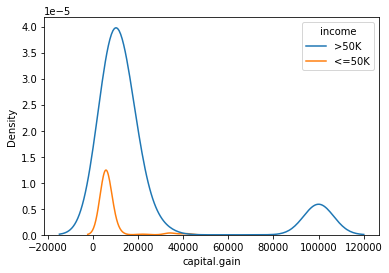

In [ ]:
sns.kdeplot(x=df.loc[df['capital.gain']>5000]['capital.gain'],hue=df.loc[df['capital.gain']>5000].income)

Notar que los colores de los graficos con respecto a los anteriores se invierten.

Vemos que en capital loss personas que perdiero alrededor de 1800- 2200 ,tenian salarios superiores a 50k.
En cambio en capital gain se observa que personas con ganacias mayores a 5000 son apliamente mas propensas a otener salarios superiores a 50k.

###Hours.per.week

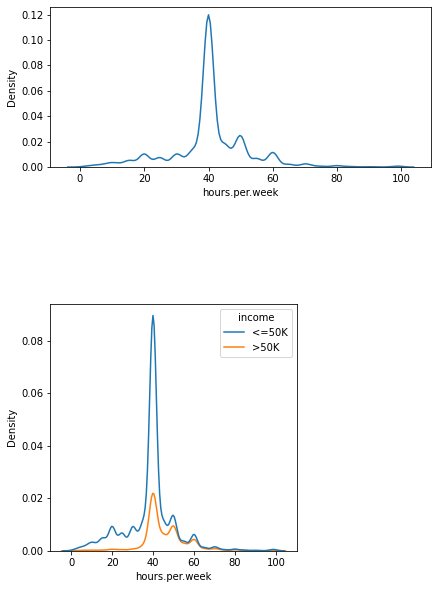

In [ ]:
#@title Graficos de horas y horas en comparacion con income
plt.figure(figsize=(15,10))
plt.subplot(321)
sns.kdeplot(df['hours.per.week'])

plt.subplot(234)
sns.kdeplot(df['hours.per.week'], hue=df.income)

En el primer grafico de arriba del todo vemos la distribucion de las horas trabajadads , en el segundo grafico vemos las horas trabajadas en relacion al ingreso

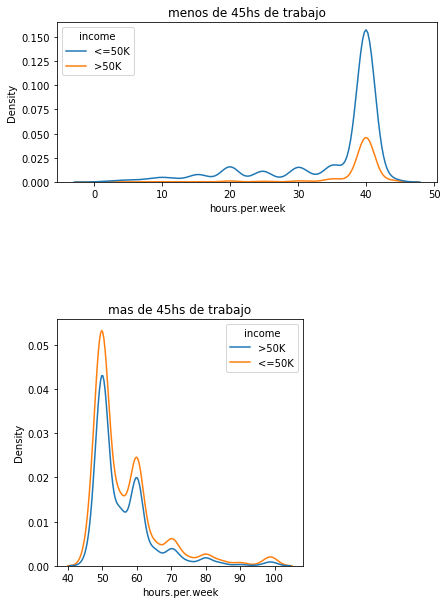

In [ ]:
#@title Graficos de horas subdivididos en menos de 45hs y mas de 45hs
plt.figure(figsize=(15,10))
plt.subplot(321)
plt.title('menos de 45hs de trabajo')
sns.kdeplot(x=df.loc[df['hours.per.week']<45]['hours.per.week'], hue=df.loc[df['hours.per.week']<45].income)

plt.subplot(234)
plt.title('mas de 45hs de trabajo')
sns.kdeplot(x=df.loc[df['hours.per.week']>45]['hours.per.week'], hue=df.loc[df['hours.per.week']>45].income)

plt.show()

Notar que los colores de las lineas se invierten en los graficos.

En estos dos ultimos graficos vemos como a partir de las 45hs trabajadas los salarios aumentan y las chances de obtener un salario mayor a 50k son mejores. Esta es la categorizacion que probablemente se tome para el modelo.




####Education.num

Esta variable es la varaible categoria de educacion presentada anteriormente , pero encodeada a numeros, que ya venia con el dataframe. 

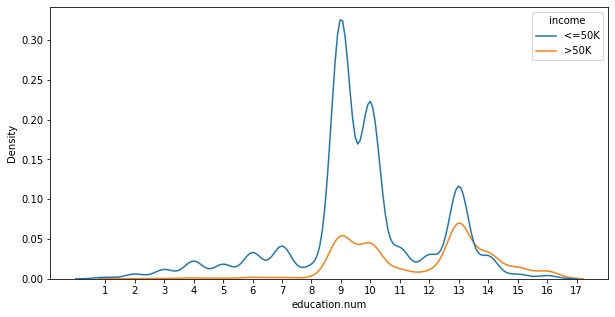

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['education.num'] , hue=df.income )
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.show()

vemos que desde el 1-7 en cuanto a nivel de educacion las chances de obtener salarios mayores a 50k es muy baja , que a partir de 8-13 las chances son mayores y de 14-17 las lineas se cruzan siendo mas comun obtener salarios de superiores a 50k.

##Resumen general 

Empezando por las variables categoricas 
* Workclass, jugando un poco con los datos vimos que se podian dividir en sector privado , que brindaba el 80% del trabajo , y sector publico o estatal. Este ultimo tiene mayor proporcion de de personas que han finalizado la universidad, y por lo tanto es el que tiene mas chances de obtener +50k. 
* Educacion vimos que en la universidad estadounidense se pueden obtener 4 tipos de titulos de Associate, bachelors ,masters, doctoral, 2,4,5,6-7 años, estos son los que suelen tener sueldos superiores a 50k junto con un titulo de secundario superior llamado prof-school.

* Marital status, se vio que la mayoria estan casados, luego le sigue solteros y divorciados> los primeros son los que mayor proporcion de  sueldos mas altos que 50k.

* Ocupacion, esta variable posee varias categorias distribuidas homogeneamente, pero que solo 2 poseen altas chances de otener salarios  de mas de 50k.Entre ellas :prof-speciality y executive manager.

* Relationship esta variable esta preodominada por husband.Siguiendole not-in-famil y own-children. comparamos con income y Wife es una de las uqe mas altos salarios percive seguido por husband.

* Race se vio que son mayoritaiamente blancos los datos de las personas que se encuentran en el dataset.

* Sex evaluamos  la cantidad de hombres y mujeres , encontrando una relacion de 67% y 33% respectivamente, luego se comparo el ingreso y se comprovo que los hombres en general poseen ingresos superiores a 50k.

* Native country vimos que tenia datos faltantes, y que la mayoria de las personas era de estados unidos, se lo considero irrelevante y se descarto.

* Age encontramos que muchas de las personas del dataset son jovenes y que por lo tanto no poseen salarios muy altos y a mediada que se hacen mayores con mas experiencia laboral los sueldos se incrementan. 

* Capital, al principo pareciera que no importaba mucho la informacion pero luego al amplificar y ver, sobretodo en la variable capital gain encontramos perosnas con ganancias mayores a 5000, poseen salarios superiores a 50k.

* Por ultimo en hours per week pudimos encontrar un patron en el cual perosnas que trabajaban mas de 45hs semanales poseeian salarios por general mayores. 






##Puesta a punto de los datos 

Por el momento para evitar imputar valores que probablemente no sean los correctos y que el modelo aprenda mal de los mismos, ademas de mantener las cosa simples y sabiendo que las columnas donde faltan datos son las mismas filas, se eliminan los nans, tambien la columna de native country y capital.loss ya que por el momento solo agraga ruido.

** se deja la columna capital los ya que aporta performance al modelo.

In [ ]:
df2=df.copy()
test2=test.copy()

In [ ]:
df2=df2.drop(columns=['native.country']).dropna()
test2=test2.drop(columns=['native.country']).dropna()

###Discretizacion de las vriables.

####Hours per week 

In [ ]:
df2['horas']=df2['hours.per.week'].copy()

In [ ]:
df2.loc[df2.horas<45,'horas']=0

In [ ]:
df2.loc[df2.horas>=45,'horas']=1

In [ ]:
df2.horas.value_counts()

0    18619
1     7491
Name: horas, dtype: int64

In [ ]:
df2.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,horas
ID,,,,,,,,,,,,,,
24451,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,<=50K,0
985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,>50K,0
30229,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,>50K,1
7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,>50K,1
27639,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,<=50K,0


####Capital gain

In [ ]:
#perosnas que tubieron capital gain y cobran mas de 50k ,se obtiene el minimo de cap gain.
df2.loc[(df['capital.gain']>100) & (df['income']=='>50K')]['capital.gain'].min()

3103

In [ ]:
#perosnas que superan el minimo de cap gain
df2.loc[(df['capital.gain']>3103)]['capital.gain'].value_counts().sum()

1775

In [ ]:
#Personas que superan los 7000 de cap gain
df2.loc[(df['capital.gain']>7000) ]['capital.gain'].value_counts().sum()

1182

In [ ]:
# Perosnas que superan los 7000 de cap gain y ganan mas de 50k, podemos ver que son casi el mismo numero que el anterior
df2.loc[(df['capital.gain']>7000) & (df['income']=='>50K')]['capital.gain'].value_counts().sum()

1165

In [ ]:
#Perosnas que tienen capital gain mayor a 0 pero menor a 7000 
df2.loc[(df['capital.gain']>10) & (df['capital.gain']<7000)]['capital.gain'].value_counts().sum()

1025

In [ ]:
#Perosnas que tienen capital gain mayor a 0 pero menor a 7000 y que ganan mas de 50k. Vemos que son muy pocas en comparacion con el numero anteriror
df2.loc[(df['capital.gain']>10) & (df['capital.gain']<7000) & (df['income']=='>50K') ]['capital.gain'].value_counts().sum()

242

comcluimos que a partir que los 7000 de capital gain los sigresos son casi siempre mayores a 50k.

In [ ]:
df2['gainmas7000']=df2['capital.gain'].copy()

In [ ]:
df2.loc[df2['gainmas7000']<7000,'gainmas7000']=0

In [ ]:
df2.loc[df2['gainmas7000']>=7000,'gainmas7000']=1

In [ ]:
df2.gainmas7000.value_counts()

0    24928
1     1182
Name: gainmas7000, dtype: int64

####Edad

In [ ]:
df2.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,horas,gainmas7000
ID,,,,,,,,,,,,,,,
24451,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,<=50K,0,0
985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,>50K,0,0
30229,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,>50K,1,0
7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,>50K,1,0
27639,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,<=50K,0,0


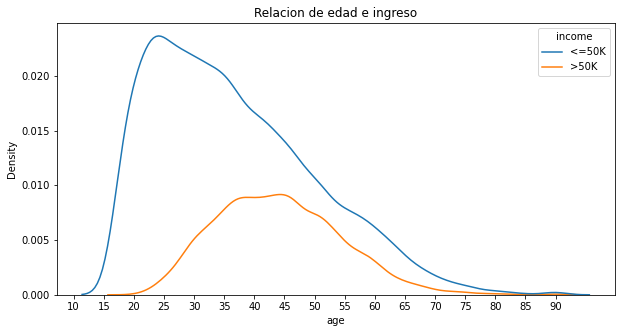

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Relacion de edad e ingreso')
sns.kdeplot(df2.age, hue=df.income)
plt.xticks([10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
plt.show()

Aca pareciera interesante subdividirlo de 10-25, 26-35, 35-90, ya que estas tres categorias poseen diferentes chances de otener salarios mayores a 50k.

In [ ]:
df2['edad']=df2['age'].copy()

In [ ]:
df2.loc[(df2.age> 0)&(df2.age<=25),'edad']=1

In [ ]:
df2.loc[(df2.age>25)&(df2.age<=35),'edad']=2

In [ ]:
df2.loc[(df2.age> 35)&(df2.age<=90),'edad']=3

In [ ]:
df2.edad.value_counts()

3    14244
2     6981
1     4885
Name: edad, dtype: int64

####Sex & Relationship

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc=OneHotEncoder(handle_unknown='error',drop='first',sparse=False)

In [ ]:
encodeado=enc.fit_transform(df2[['sex', 'relationship', 'income']])

In [ ]:
coll=enc.get_feature_names(['sex','relationship','income'])

In [ ]:
# aca hubo que ponerle el index del df2 para que el concat los uniera bien, si le ponia el arg ignore index lo seguia haciendo mal.
dfenc=pd.DataFrame(encodeado, columns=coll,index=df2.index)

In [ ]:
dfenc.head()

,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,income_>50K
ID,,,,,,,
24451,0.0,0.0,0.0,1.0,0.0,0.0,0.0
985,0.0,0.0,0.0,0.0,0.0,1.0,1.0
30229,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7107,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27639,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfenc.shape

(26110, 7)

In [ ]:
df2=pd.concat([df2,dfenc],axis=1)

##Entrenamiento del primer modelo para evaluar  como reacciona ante las variables 

In [ ]:
df2.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,horas,gainmas7000,edad,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,income_>50K
ID,,,,,,,,,,,,,,,,,,,,,,,
24451,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,<=50K,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,>50K,0,0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0
30229,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,>50K,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,>50K,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27639,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,<=50K,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=df2.drop(columns=['income','income_>50K'])
y=df2['income_>50K']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
tree = DecisionTreeClassifier(random_state=0,max_depth=10)

In [ ]:
elementoshiperproc=['horas','edad','gainmas7000','education.num']

In [ ]:
elementoshiperproc1=['horas','edad','gainmas7000','education.num','sex_Male','relationship_Not-in-family', 'relationship_Other-relative','relationship_Own-child','relationship_Unmarried',	'relationship_Wife']

In [ ]:
tree.fit(X_train[elementoshiperproc1],y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pruebatest=tree.predict(X_test[elementoshiperproc1])
pruebatrain=tree.predict(X_train[elementoshiperproc1])

###Scores


In [ ]:
print(f'Accuracy Train :{accuracy_score(y_train,pruebatrain)*100}')

Accuracy Train :84.2253925698966


In [ ]:
print(f' Accuracy Test :{accuracy_score(y_test,pruebatest)*100}')

 Accuracy Test :84.25890463423976


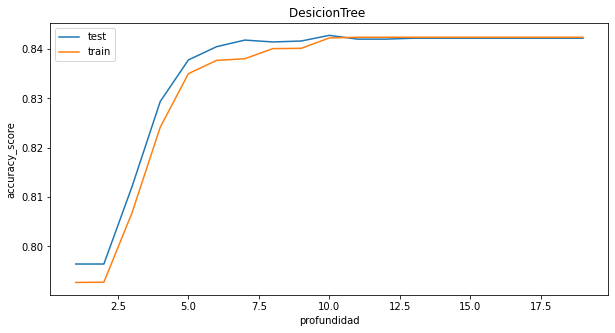

In [ ]:
#@title 
# Lista para acumular tuplas de scores (train[],test[])
scores_indiv = []
# Se define una constante para el límite de profundidad de los arboles
MAX = 20

# necesario limpiar las listas de scores cuando se cambia de feature
accur_train = []
accur_test  = []

# for para generar arboles con distintas profundidades para cada feature
for i in range(1,MAX):
  # se genera el arbol
  tree = DecisionTreeClassifier(max_depth=i, random_state=42)
  # se lo entrena con una feature sola
  tree.fit(X_train[elementoshiperproc1], y_train)
  # se realizan las predicciones
  train_preds = tree.predict(X_train[elementoshiperproc1])
  test_preds = tree.predict(X_test[elementoshiperproc1])
  # se calculan los scores de train y test y se guardan 
  accur_train.append(accuracy_score(y_train, train_preds))
  accur_test.append(accuracy_score(y_test, test_preds))

# se guardan los resultados de todas las profundidades para cada feature
scores_indiv.append((accur_train, accur_test))

# por ultimo se grafican los scores para cada feature individual
plt.figure(figsize=(10,5))
plt.title('DesicionTree ')
plt.plot(np.arange(1,MAX),accur_test,label='test')
plt.plot(np.arange(1,MAX),accur_train,label='train')
plt.xlabel('profundidad')
plt.ylabel('accuracy_score')
plt.legend()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1test=f1_score(y_test,pruebatest, average='macro')
f1train=f1_score(y_train,pruebatrain, average='macro')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test,pruebatest))


[[3622  292]
 [ 530  778]]


In [ ]:

print(classification_report(y_test, pruebatest))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      3914
         1.0       0.73      0.59      0.65      1308

    accuracy                           0.84      5222
   macro avg       0.80      0.76      0.78      5222
weighted avg       0.84      0.84      0.84      5222



In [ ]:
print(f'El F1 Test Score es: {round(f1test*100,2)}')
print(f'El F1 Train Score es: {round(f1train*100,2)}')

El F1 Test Score es: 77.62
El F1 Train Score es: 77.26


In [ ]:
# Comparacion de como se modifican los scores con la info original y luego de la info hiperprocesada.
#hours per week-->77.53 15=MD
# horas --------->78.62 15=MD

#Age------------->76.53 15=MD
#edad------------>78.53 15=MD

#Capital.gain---->77.53 15=MD
#gainmas7000----->78.53 15=MD

# Concluimos que mientras mas pocesados los datos mejor performa el modelo  asi que vamos a continuar 
# por es lado.

##Continuamos procesadno datos para ver la reaccion del modelo

In [ ]:
variabl=enc.fit_transform(df2[['workclass','marital.status','occupation']])
nombrecol=enc.get_feature_names(['workclass','marital.status','occupation'])
enc3=pd.DataFrame(variabl,columns=nombrecol,index=df2.index)
enc3.head()
df2=pd.concat([df2,enc3],axis=1)

###Workclass


In [ ]:
df2['trabajos']=df2['workclass']

In [ ]:
df2.trabajos.unique()

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [ ]:
df2.loc[df2['trabajos'].isin(['Self-emp-inc']),'trabajos']=3

In [ ]:
df2.loc[df2['trabajos'].isin(['Local-gov','Federal-gov','State-gov']),'trabajos']=2

In [ ]:
df2.loc[df2['trabajos'].isin(['Private','Self-emp-not-inc','Without-pay']),'trabajos']=1

In [ ]:
df2.loc[df2['trabajos'].isin(['?','Never-worked']),'trabajos']=0

In [ ]:
df2.trabajos.unique()

array([2, 1, 3], dtype=object)

In [ ]:
contrabajo=['trabajos','horas','edad','gainmas7000','education.num','sex_Male','relationship_Not-in-family', 'relationship_Other-relative','relationship_Own-child','relationship_Unmarried',	'relationship_Wife']

###Occupation

In [ ]:
df2.occupation.unique()

array(['Protective-serv', 'Exec-managerial', 'Craft-repair',
       'Prof-specialty', 'Tech-support', 'Other-service',
       'Transport-moving', 'Adm-clerical', 'Farming-fishing',
       'Handlers-cleaners', 'Sales', 'Machine-op-inspct',
       'Priv-house-serv', 'Armed-Forces'], dtype=object)

In [ ]:
df2['ocupa']=df2['occupation']

In [ ]:
df2.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,horas,gainmas7000,edad,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,income_>50K,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,trabajos,ocupa
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24451,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,<=50K,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,Protective-serv
985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,>50K,0,0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Exec-managerial
30229,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,>50K,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Craft-repair
7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,>50K,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,Prof-specialty
27639,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,<=50K,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Exec-managerial


In [ ]:
df2.ocupa

ID
24451     Protective-serv
985       Exec-managerial
30229        Craft-repair
7107       Prof-specialty
27639     Exec-managerial
               ...       
29802    Transport-moving
5390       Prof-specialty
860          Tech-support
15795               Sales
23654     Exec-managerial
Name: ocupa, Length: 26110, dtype: object

In [ ]:
df2.loc[df2.ocupa.isin(['Exec-managerial','Prof-specialty']),'ocupa']=3

In [ ]:
df2.loc[df2['ocupa'].isin(['Tech-support','Protective-serv']),'ocupa']=2

In [ ]:
df2.loc[df2['ocupa'].isin(['Craft-repair','Other-service','Transport-moving','Adm-clerical','Farming-fishing','Handlers-cleaners','Sales','Priv-house-serv','Armed-Forces','Machine-op-inspct']),'ocupa']=1

In [ ]:
df2.loc[df2['ocupa'].isin(['?']),'ocupa']=0

In [ ]:
df2.ocupa.unique()

array([2, 3, 1], dtype=object)

###Marital status

In [ ]:
df2['marital.status'].unique()

array(['Divorced', 'Married-civ-spouse', 'Never-married', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
df2['estado_civ']=df2['marital.status']

In [ ]:
df2.loc[df2['estado_civ'].isin(['Married-civ-spouse']),'estado_civ']=1

In [ ]:
df2.loc[df2['estado_civ'].isin(['Divorced','Never-married', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse']),'estado_civ']=0

In [ ]:
df2.estado_civ.value_counts()

0    13928
1    12182
Name: estado_civ, dtype: int64

###Relationship

In [ ]:
df2.relationship.unique()

array(['Own-child', 'Wife', 'Husband', 'Not-in-family', 'Unmarried',
       'Other-relative'], dtype=object)

In [ ]:
df2['relaciones']=df2['relationship']

In [ ]:
df2.loc[df2['relationship'].isin(['Wife','Husband']),'relaciones']=1

In [ ]:
df2.loc[df2['relationship'].isin(['Own-child','Not-in-family','Unmarried','Other-relative']),'relaciones']=0

In [ ]:
df2.relaciones.unique()

array([0, 1], dtype=object)

In [ ]:
#df['native.country'].unique()

In [ ]:
#df.loc[(df['native.country']=='United-States') ]['native.country'].value_counts()

In [ ]:
#df.income.unique()

In [ ]:
#df.loc[(df['native.country']=='United-States') & (df.income=='>50K') ]['native.country'].value_counts()

In [ ]:
#df.loc[(df['native.country']!='United-States') & (df.income=='>50K') ]['native.country'].value_counts().sum()

In [ ]:
#df.loc[(df['native.country']!='United-States') ]['native.country'].value_counts().sum()

In [ ]:
df.isna().sum()

age                  0
workclass         1539
education            0
education.num        0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     504
income               0
dtype: int64

In [ ]:
nuevasvar=['trabajos','ocupa','estado_civ','relaciones']

In [ ]:
varenc=enc.fit_transform(df2[['horas','edad','gainmas7000','education.num','trabajos','ocupa','estado_civ','relaciones']])
varenc

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [ ]:
nombvar=enc.get_feature_names(elementoshiperproc+nuevasvar)

In [ ]:
encodvar=pd.DataFrame(varenc,columns=nombvar, index=df2.index)

In [ ]:
df2=pd.concat([df2,encodvar],axis=1)

##Entrenamiento del segundo modelo, prueba con diferentes features  y combinaciones.

In [ ]:
X=df2.drop(columns=['income','income_>50K'])
y=df2['income_>50K']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
X.columns


Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'horas', 'gainmas7000', 'edad',
       'sex_Male', 'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', '

In [ ]:
elementosproc1=['horas','edad','capital.gain','education.num']   # horas, edad , gainmas7000 , education.num

In [ ]:
elementosproc2=['trabajos','ocupa','estado_civ','relaciones','sex_Male','capital.loss'] #Trabajos, occupation, estado civ , relac , sex , capital loss

In [ ]:
datos_crudos=[ 'sex_Male','education.num','capital.gain','hours.per.week','age',     #Sex & education & hours , age
          'relationship_Not-in-family', 'relationship_Other-relative',              #Relationship      
          'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',  #Relationship
          'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',     #work
          'workclass_Self-emp-not-inc', 'workclass_State-gov',                      #work
          'workclass_Without-pay', 'marital.status_Married-AF-spouse',              #Work & marital stat
          'marital.status_Married-civ-spouse',                                      #Marital stat
          'marital.status_Married-spouse-absent', 'marital.status_Never-married',   #Marital stat
          'marital.status_Separated', 'marital.status_Widowed',                     #Marital stat
          'occupation_Armed-Forces', 'occupation_Craft-repair',                     #Occupation
          'occupation_Exec-managerial', 'occupation_Farming-fishing',               #Occupation
          'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',           #Occupation
          'occupation_Other-service', 'occupation_Priv-house-serv',                 #Occupation
          'occupation_Prof-specialty', 'occupation_Protective-serv',                #Occupation
          'occupation_Sales', 'occupation_Tech-support',                            #Occupation
          'occupation_Transport-moving','capital.gain','capital.loss' ]             #Occupation , capital gain , capital los

In [ ]:
elementosencodeados=['sex_Male','horas_1', 'edad_2', 'edad_3', 'capital.gain', #sex &hours & edad & gainmas7000
       'education.num_2', 'education.num_3', 'education.num_4',                 #education
       'education.num_5', 'education.num_6', 'education.num_7',
       'education.num_8', 'education.num_9', 'education.num_10',
       'education.num_11', 'education.num_12', 'education.num_13',
       'education.num_14', 'education.num_15', 'education.num_16',
       'trabajos_2', 'trabajos_3', 'ocupa_2', 'ocupa_3', 'estado_civ_1',        #trabajos & occupation & relac ,estado civ, capital loss
       'relaciones_1','capital.loss']

In [ ]:
tree2=DecisionTreeClassifier(random_state=0,max_depth=10)

In [ ]:
tree2.fit(X_train[datos_crudos],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pruebatest2=tree2.predict(X_test[datos_crudos])
pruebatrain2=tree2.predict(X_train[datos_crudos])

In [ ]:
print(f'Accuracy Train :{accuracy_score(y_train,pruebatrain2)*100}')

Accuracy Train :86.68134814247415


In [ ]:
print(f' Accuracy Test :{accuracy_score(y_test,pruebatest2)*100}')

 Accuracy Test :85.50363845270012


In [ ]:
print(confusion_matrix(y_test,pruebatest2))


[[3664  250]
 [ 507  801]]


In [ ]:

print(classification_report(y_test, pruebatest2))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3914
         1.0       0.76      0.61      0.68      1308

    accuracy                           0.86      5222
   macro avg       0.82      0.77      0.79      5222
weighted avg       0.85      0.86      0.85      5222



In [ ]:
f1test2=f1_score(y_test,pruebatest2, average='macro')
f1train2=f1_score(y_train,pruebatrain2, average='macro')

In [ ]:
print(f'El F1 Test Score es: {round(f1test2*100,2)}')
print(f'El F1 Train Score es: {round(f1train2*100,2)}')

El F1 Test Score es: 79.27
El F1 Train Score es: 80.63


Accuracy Test :-----------> 86.0
El F1 Test Score es:------> 79.4
El F1 Train Score es:-----> 90.2


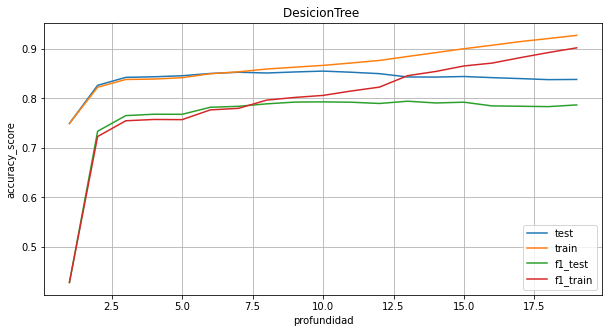

In [ ]:
#@title ##Arbol sin elementos previamente procesados, solo encodeados
#@title 
MAX = 20
accur_train = []
accur_test  = []
f1_train=[]
f1_test=[]
for i in range(1,MAX):
  tree3=DecisionTreeClassifier(random_state=i,max_depth=i)
  tree3.fit(X_train[datos_crudos],y_train)
  accur_test.append(accuracy_score(y_test,tree3.predict(X_test[datos_crudos])))
  accur_train.append(accuracy_score(y_train,tree3.predict(X_train[datos_crudos])))
  f1_train.append(f1_score(y_train,tree3.predict(X_train[datos_crudos]),average='macro'))
  f1_test.append(f1_score(y_test,tree3.predict(X_test[datos_crudos]),average='macro'))

  #
  # por ultimo se grafican los scores para cada feature individual
plt.figure(figsize=(10,5))
plt.title('DesicionTree ')
plt.plot(np.arange(1,MAX),accur_test,label='test')
plt.plot(np.arange(1,MAX),accur_train,label='train')
plt.plot(np.arange(1,MAX),f1_test,label='f1_test')
plt.plot(np.arange(1,MAX),f1_train,label='f1_train')
plt.xlabel('profundidad')
plt.ylabel('accuracy_score')
plt.grid()
plt.legend()
print(f'Accuracy Test :-----------> {round(max(accur_test),2)*100}')
print(f'El F1 Test Score es:------> {round(max(f1_test),3)*100}')
print(f'El F1 Train Score es:-----> {round(max(f1_train),3)*100}')


Accuracy Test :-----------> 86.0
El F1 Test Score es:------> 79.9
El F1 Train Score es:-----> 81.8


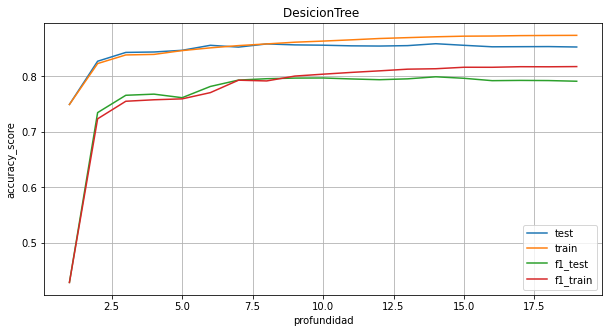

In [ ]:
#@title ##Arbol con todos elementos procesados.
MAX = 20
accur_train = []
accur_test  = []
f1_train=[]
f1_test=[]
for i in range(1,MAX):
  tree3=DecisionTreeClassifier(random_state=i,max_depth=i)
  tree3.fit(X_train[elementosproc1+elementosproc2],y_train)
  accur_test.append(accuracy_score(y_test,tree3.predict(X_test[elementosproc1+elementosproc2])))
  accur_train.append(accuracy_score(y_train,tree3.predict(X_train[elementosproc1+elementosproc2])))
  f1_train.append(f1_score(y_train,tree3.predict(X_train[elementosproc1+elementosproc2]),average='macro'))
  f1_test.append(f1_score(y_test,tree3.predict(X_test[elementosproc1+elementosproc2]),average='macro'))

  #
  # por ultimo se grafican los scores para cada feature individual
plt.figure(figsize=(10,5))
plt.title('DesicionTree ')
plt.plot(np.arange(1,MAX),accur_test,label='test')
plt.plot(np.arange(1,MAX),accur_train,label='train')
plt.plot(np.arange(1,MAX),f1_test,label='f1_test')
plt.plot(np.arange(1,MAX),f1_train,label='f1_train')
plt.xlabel('profundidad')
plt.ylabel('accuracy_score')
plt.grid()
plt.legend()
print(f'Accuracy Test :-----------> {round(max(accur_test),2)*100}')
print(f'El F1 Test Score es:------> {round(max(f1_test),3)*100}')
print(f'El F1 Train Score es:-----> {round(max(f1_train),3)*100}')

In [ ]:
tree3=DecisionTreeClassifier(random_state=6,max_depth=7)
tree3.fit(X_train[elementosproc1+elementosproc2],y_train)

print(f1_score(y_train,tree3.predict(X_train[elementosproc1+elementosproc2]),average='macro'))
print(f1_score(y_test,tree3.predict(X_test[elementosproc1+elementosproc2]),average='macro'))


0.793268172701979
0.7934658833417104


Accuracy Test :-----------> 85.0
El F1 Test Score es:------> 79.0
El F1 Train Score es:-----> 81.6


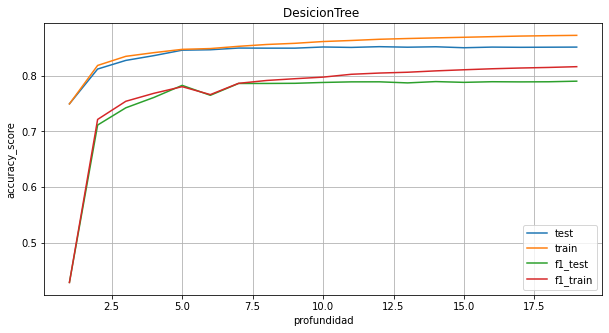

In [ ]:
#@title Arbol con elementos procesados y encodeados
MAX = 20
Columnas_a_evaluar=elementosencodeados
accur_train = []
accur_test  = []
f1_train=[]
f1_test=[]
for i in range(1,MAX):
  tree3=DecisionTreeClassifier(random_state=i,max_depth=i)
  tree3.fit(X_train[Columnas_a_evaluar],y_train)
  accur_test.append(accuracy_score(y_test,tree3.predict(X_test[Columnas_a_evaluar])))
  accur_train.append(accuracy_score(y_train,tree3.predict(X_train[Columnas_a_evaluar])))
  f1_train.append(f1_score(y_train,tree3.predict(X_train[Columnas_a_evaluar]),average='macro'))
  f1_test.append(f1_score(y_test,tree3.predict(X_test[Columnas_a_evaluar]),average='macro'))

  #
  # por ultimo se grafican los scores para cada feature individual
plt.figure(figsize=(10,5))
plt.title('DesicionTree ')
plt.plot(np.arange(1,MAX),accur_test,label='test')
plt.plot(np.arange(1,MAX),accur_train,label='train')
plt.plot(np.arange(1,MAX),f1_test,label='f1_test')
plt.plot(np.arange(1,MAX),f1_train,label='f1_train')
plt.xlabel('profundidad')
plt.ylabel('accuracy_score')
plt.grid()
plt.legend()
print(f'Accuracy Test :-----------> {round(max(accur_test),2)*100}')
print(f'El F1 Test Score es:------> {round(max(f1_test),3)*100}')
print(f'El F1 Train Score es:-----> {round(max(f1_train),3)*100}')

Se evaluan las distintas performance de los modelos, se probo al principio sin las variables capital loss pensando que al incuirla traeria ruido al modelo y disminuiria la performance, pero sucedio todo lo opuesto, tambien podemos observar que de los tres modelos que tenemos aca el primero tiene una alta variabilidad, esto se supone que es porque los datos no fueron casi procesados, es decir a las variables categoricas se las encodeo para que pueda asimilarlas el modelo, las numericas se las dejo tal cual, esto genero que  el modeo tubiese muchisimas mas columnas con la sque trabajar, ocasiono un overfiteo de los datos por eso podemos ver que en test performo un f1 de un 79,4% y en  train un 90,2% , teniendo una diferencia de 11% entre ambos.

Por otro lado los dos modelos conscutivos tienen datos donde las variables categoriacas fueron procesadas con el criterio de que subcategoria/as tenian las mayores chances de tener salarios superiores a 50k. Esto pareciera que genero un modelo mas estable teniendo un rendimento f1 de 80% en test y 82% en train. Reduciendo la bracha y diminuyendo de esta manera el overfitting y teniedo mayor capacidad de generalizar, sobretodo ante datos nuevos.

 Tambien se puedo observar que los arboles manejan muy bien la informacion numerica sin procesamiento, pero la que informacion categorica es necasario generar nuevas categorias para que pueda tomar mejores decicieones y disminuir el overfitting.esto se ve mejor cuando en el modelo de procesados se cambia la columna gainmas7000 que calsifica en 1 y 0 si obtubieron una capitalgain mas de 7000 o no. Al poner la columna capital loss el modelo performa mejor.

In [ ]:
#@title 
df2['native_country']=df['native.country']
df2.native_country.unique()
df2.loc[df2.native_country!='United-States'].income.value_counts(normalize=True)
df2.loc[df2.native_country=='United-States'].income.value_counts(normalize=True)
df2.loc[(df2.native_country.isnull())].income.value_counts(normalize=True)
df2.native_country.fillna('United-States', inplace=True)
df2.loc[df2.native_country!='United-States','native_country']=0
df2.loc[df2.native_country=='United-States','native_country']=1
df2.native_country.unique()

array([1, 0], dtype=object)

In [ ]:
X=df2.drop(columns=['income','income_>50K'])
y=df2['income_>50K']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, stratify=y)

Accuracy Test :-----------> 86.0
El F1 Test Score es:------> 79.80000000000001
El F1 Train Score es:-----> 82.19999999999999


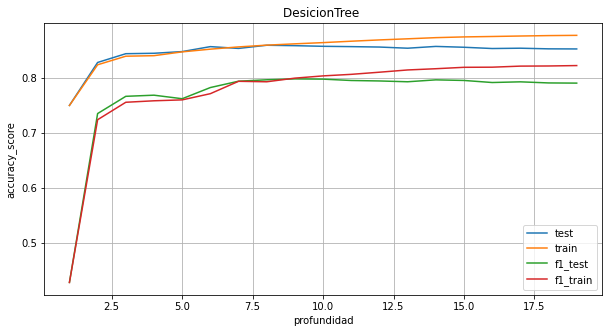

In [ ]:
#@title Para probar si la columna native country hacia ruido o no !
#@title 
MAX = 20
Columnas_a_evaluar=elementosproc1+elementosproc2+['native_country']
accur_train = []
accur_test  = []
f1_train=[]
f1_test=[]
for i in range(1,MAX):
  tree3=DecisionTreeClassifier(random_state=i,max_depth=i)
  tree3.fit(X_train[Columnas_a_evaluar],y_train)
  accur_test.append(accuracy_score(y_test,tree3.predict(X_test[Columnas_a_evaluar])))
  accur_train.append(accuracy_score(y_train,tree3.predict(X_train[Columnas_a_evaluar])))
  f1_train.append(f1_score(y_train,tree3.predict(X_train[Columnas_a_evaluar]),average='macro'))
  f1_test.append(f1_score(y_test,tree3.predict(X_test[Columnas_a_evaluar]),average='macro'))

  #
  # por ultimo se grafican los scores para cada feature individual
plt.figure(figsize=(10,5))
plt.title('DesicionTree ')
plt.plot(np.arange(1,MAX),accur_test,label='test')
plt.plot(np.arange(1,MAX),accur_train,label='train')
plt.plot(np.arange(1,MAX),f1_test,label='f1_test')
plt.plot(np.arange(1,MAX),f1_train,label='f1_train')
plt.xlabel('profundidad')
plt.ylabel('accuracy_score')
plt.grid()
plt.legend()
print(f'Accuracy Test :-----------> {round(max(accur_test),2)*100}')
print(f'El F1 Test Score es:------> {round(max(f1_test),3)*100}')
print(f'El F1 Train Score es:-----> {round(max(f1_train),3)*100}')

##Evaluacion de los Nan's y criterio de imputacion 

Una vez evaluadas todas la variables y su relacion con la variable respuesta vamos a indager en los valores faltantes y ver el lugar que tieene en  el data frame y de esta manera obtener un criterio de imputacion.

In [ ]:
df.loc[df.workclass.isna()].workclass.value_counts(dropna=False)

NaN    1539
Name: workclass, dtype: int64

In [ ]:
df.loc[df.occupation.isna()].occupation.value_counts(dropna=False)

NaN    1546
Name: occupation, dtype: int64

In [ ]:
workclassindex=list(df.loc[df.workclass.isna()].index)

In [ ]:
occupationindex=list(df.loc[df.occupation.isna()].index)

In [ ]:
# Interseccion entre las dos listas , hay 7 valores mas en occupation 
prueba=list(set(workclassindex).intersection(set(occupationindex)))
print(len(prueba))

1539


In [ ]:
df3=df.copy()

In [ ]:
df3=df3.drop(index=workclassindex ,axis=0)

In [ ]:
df3.occupation.value_counts(dropna=False)

Prof-specialty       3539
Craft-repair         3509
Exec-managerial      3450
Adm-clerical         3237
Sales                3065
Other-service        2774
Machine-op-inspct    1692
Transport-moving     1378
Handlers-cleaners    1162
Farming-fishing       853
Tech-support          767
Protective-serv       557
Priv-house-serv       120
Armed-Forces            7
NaN                     7
Name: occupation, dtype: int64

In [ ]:
df3.loc[df3.occupation.isna()]

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
ID,,,,,,,,,,,,,,
17084,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
13672,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
24468,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32315,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
8872,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
32308,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
21925,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


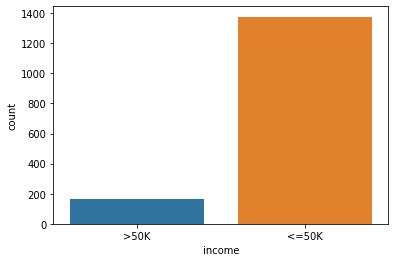

In [ ]:
sns.countplot(df.loc[df.workclass.isna()].income)

In [ ]:
df.loc[df.workclass.isna()].income.value_counts(normalize=True)

<=50K    0.894737
>50K     0.105263
Name: income, dtype: float64

Podemos observar que los datos faltantes no se cmportan igual que los datos comunes, tenemos un 90% de personas que ganan menos de 50k y solo un 10 que ganana mas de 50k.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

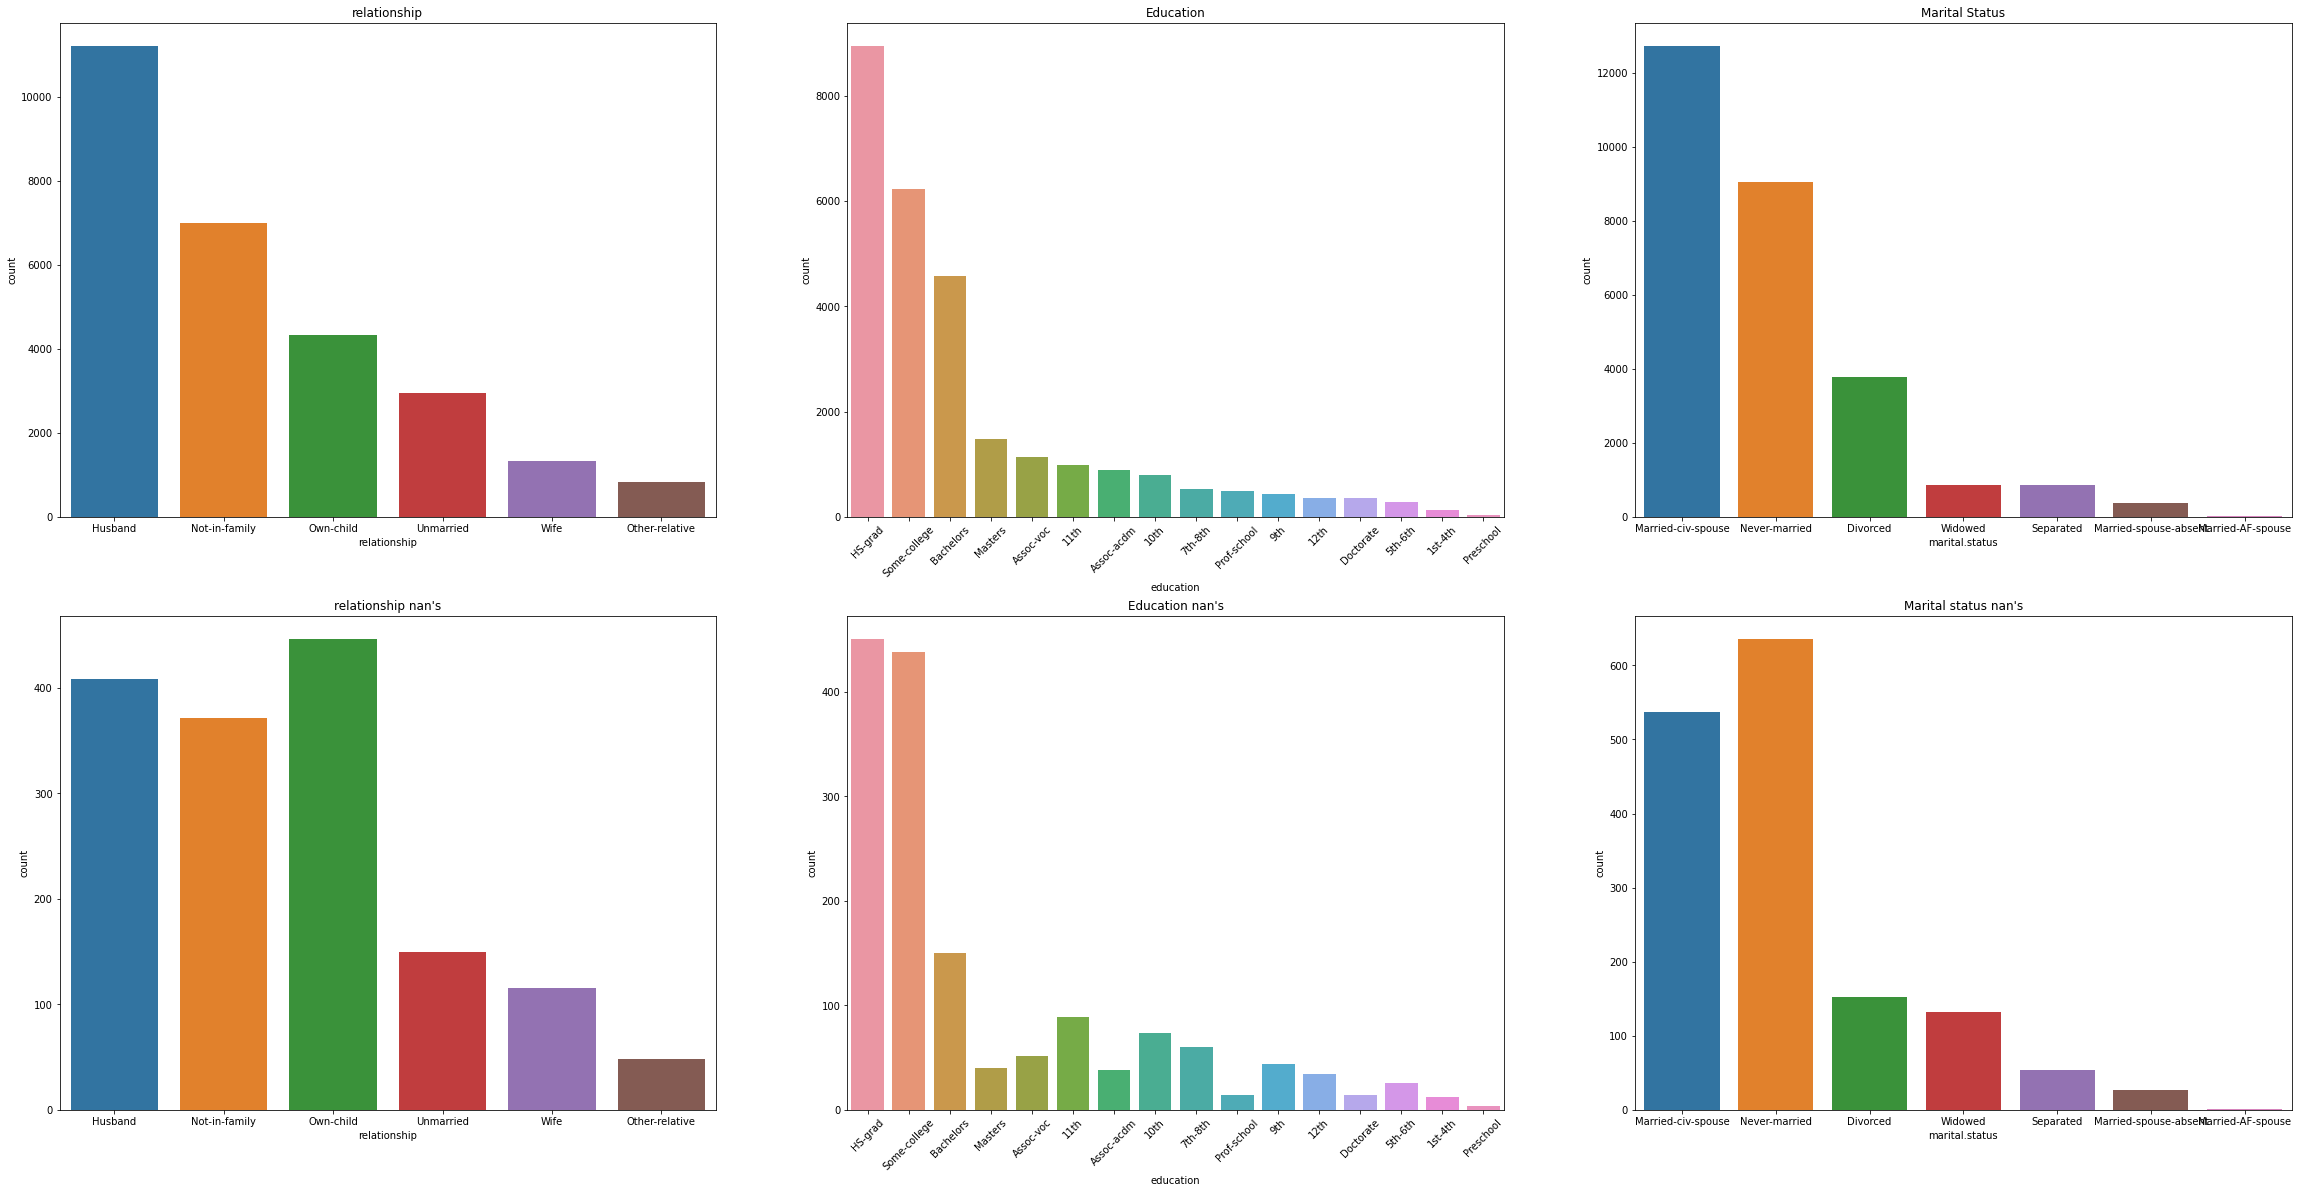

In [ ]:
#@title Comparacion relationship , education , marital status
plt.figure(figsize=(40,20))



plt.subplot(231)
plt.title("relationship")
sns.countplot(df['relationship'], order=df.relationship.value_counts(ascending=False).index)

plt.subplot(232)
plt.title("Education")
sns.countplot(df.education,order=df.education.value_counts(ascending=False).index)
plt.xticks(rotation=45)

plt.subplot(233)
plt.title('Marital Status')
sns.countplot(df['marital.status'],order=df['marital.status'].value_counts(ascending=False).index)



plt.subplot(234)
plt.title("relationship nan's")
sns.countplot(df.loc[df.workclass.isna()]['relationship'], order=df.relationship.value_counts(ascending=False).index)

plt.subplot(235)
plt.title("Education nan's")
sns.countplot(df.loc[df.workclass.isna()].education,order=df.education.value_counts(ascending=False).index)
plt.xticks(rotation=45)


plt.subplot(236)
plt.title("Marital status nan's")
sns.countplot(df.loc[df.workclass.isna()]['marital.status'],order=df['marital.status'].value_counts(ascending=False).index)

plt.show()

Aca vemos las relaciones del data frame original las cuales son las que estan graficas arriba, no son las mismas que las relaciones de los datos faltantes, para los cuales en general hay un aumento en las clases-subclases que menor chance de obtener un salario superior a 50k tienen

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

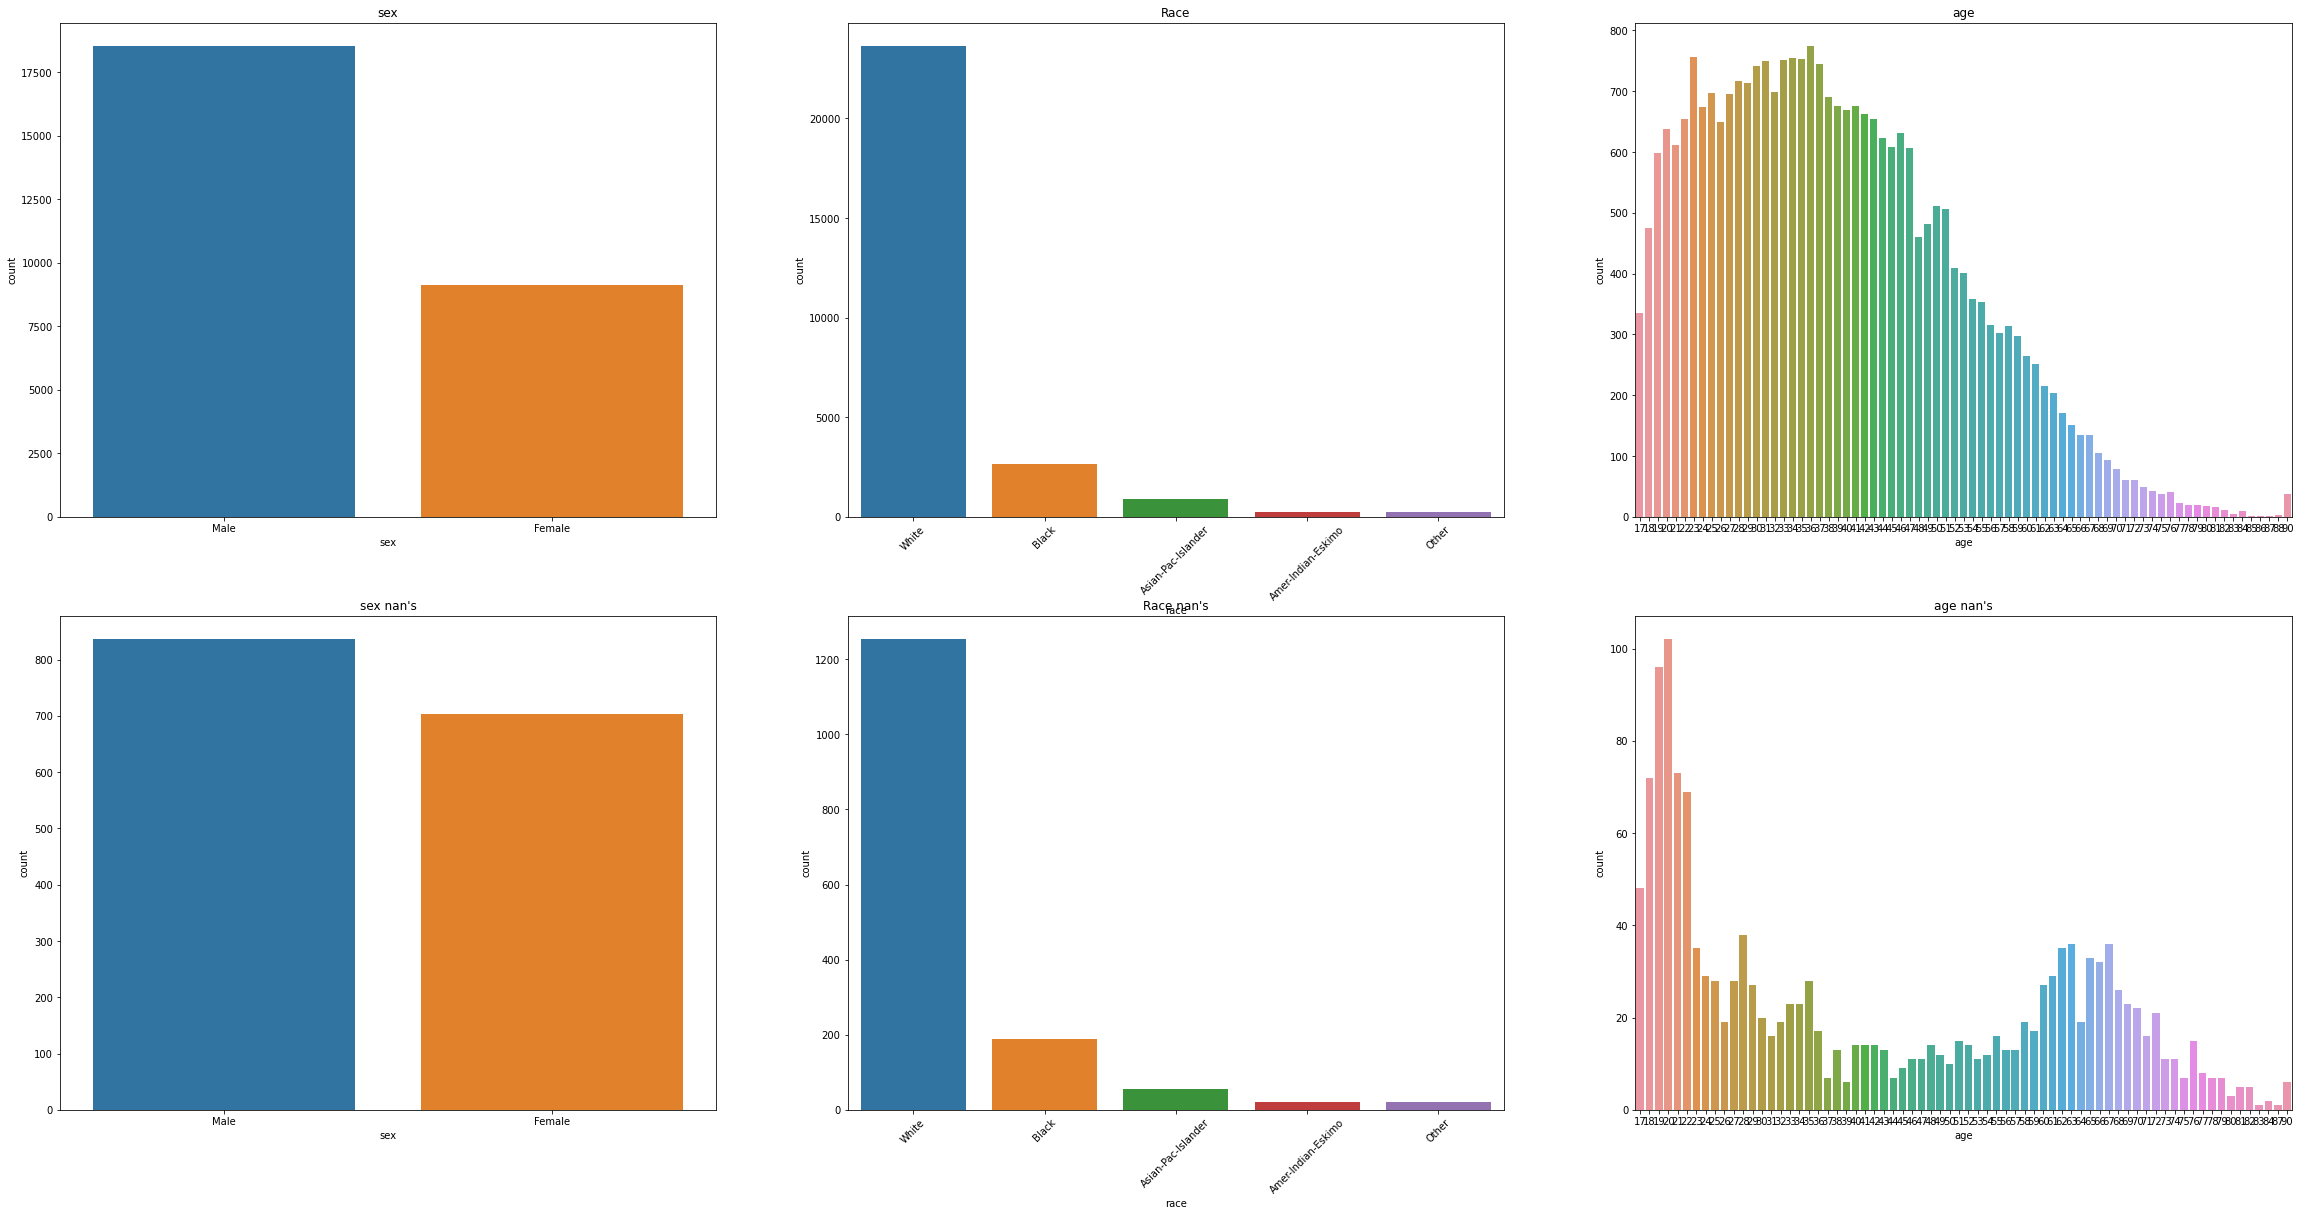

In [ ]:
#@title Comparacion sex , race , age
plt.figure(figsize=(40,20))



plt.subplot(231)
plt.title("sex")
sns.countplot(df['sex'], order=df.sex.value_counts(ascending=False).index)

plt.subplot(232)
plt.title("Race")
sns.countplot(df.race,order=df.race.value_counts(ascending=False).index)
plt.xticks(rotation=45)

plt.subplot(233)
plt.title('age')
sns.countplot(df['age'])



plt.subplot(234)
plt.title("sex nan's")
sns.countplot(df.loc[df.workclass.isna()]['sex'], order=df.sex.value_counts(ascending=False).index)

plt.subplot(235)
plt.title("Race nan's")
sns.countplot(df.loc[df.workclass.isna()].race,order=df.race.value_counts(ascending=False).index)
plt.xticks(rotation=45)

plt.subplot(236)
plt.title("age nan's")
sns.countplot(df.loc[df.workclass.isna()]['age'],)


plt.show()

En cuanto al sexo tenemos que los datos faltantes hay un aumento en la proporcion de mujeres, en cuanto a la raza pareciara no haber cambios en las relaciones, y en cuanto a la edad vemos que tenemos  dos picos el primero esta representado por personas jovenesque, son la mayoria, y el segundo pico por personas de alrededor de los 60 años, esto pdria explicar el incremento en el grafico de marital.status en la barra de widow(violeta), por ultimo el primer pico podria indicarnos que gran parte son jovenes con niños a cargo ya que vemos un fuerte incremento en own-child en el grafico relationships, explicando tambien el bajo nivel de educacion que presentan el dataframe de los datos faltantes.

In [ ]:
df.loc[(df.workclass.isna()) ].income.value_counts()

<=50K    1377
>50K      162
Name: income, dtype: int64

In [ ]:
df2.groupby('trabajos').income.value_counts(normalize=True)

trabajos  income
1         <=50K     0.773649
          >50K      0.226351
2         <=50K     0.689590
          >50K      0.310410
3         >50K      0.561385
          <=50K     0.438615
Name: income, dtype: float64

In [ ]:
df2.groupby('ocupa').income.value_counts(normalize=True)

ocupa  income
1      <=50K     0.839804
       >50K      0.160196
2      <=50K     0.691088
       >50K      0.308912
3      <=50K     0.530548
       >50K      0.469452
Name: income, dtype: float64

Se realiza la imputacion de nans con una knn imputer para que tome como referencia los casos mas parecidos, tendria que imputar para trabajos un 1 y para occuption tambien  en la categoria 1.

In [ ]:
test.shape

(4881, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

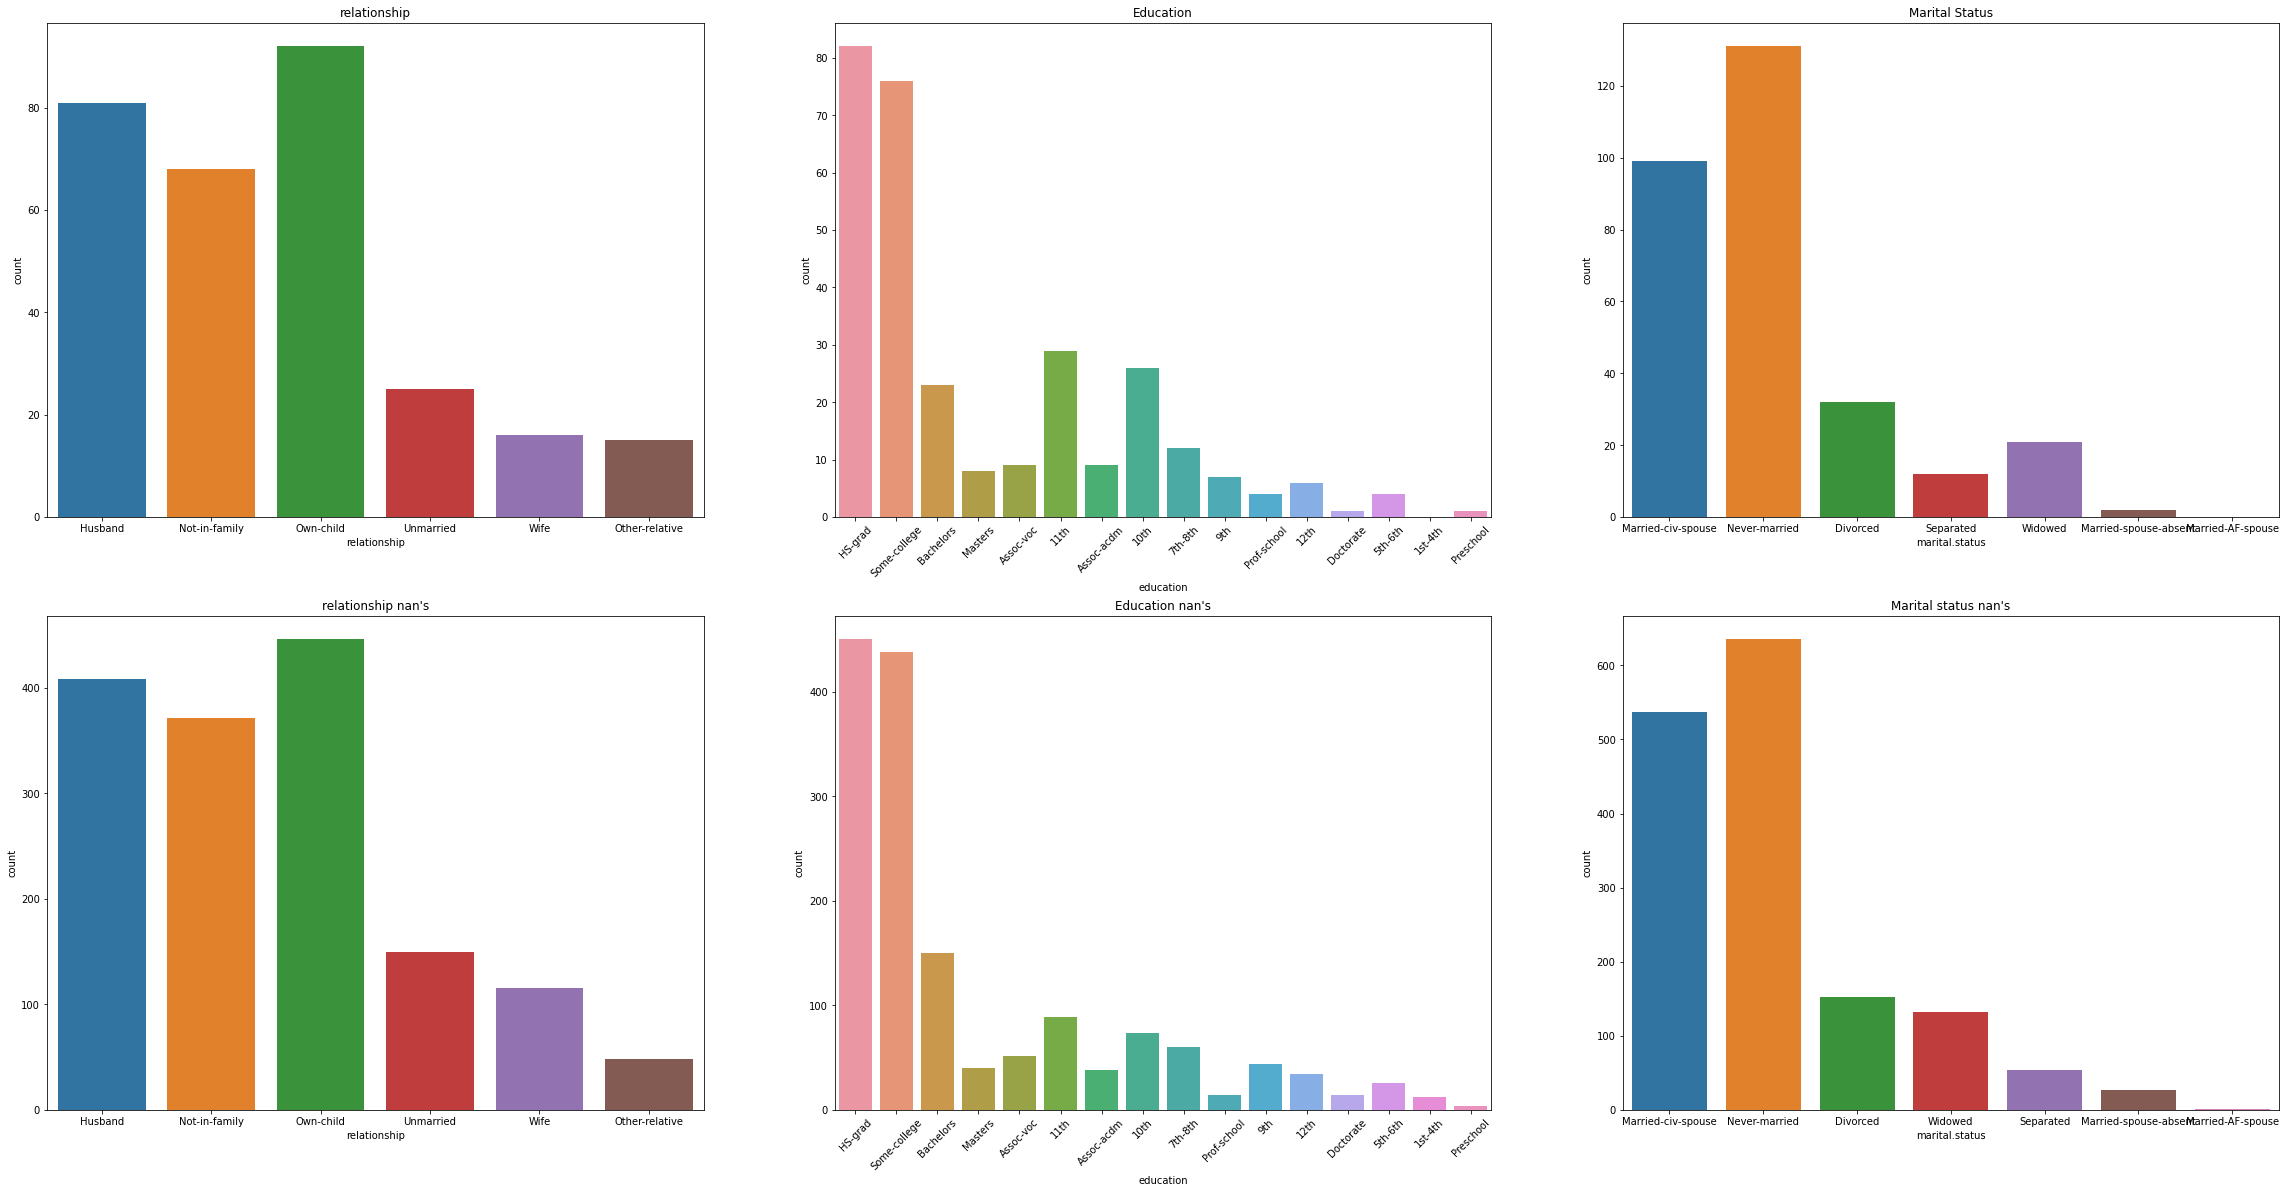

In [ ]:
#@title Comparacion de los nans del data frame con los de test
plt.figure(figsize=(40,20))



plt.subplot(231)
plt.title("relationship")
sns.countplot(test.loc[test.workclass.isna()]['relationship'], order=test.relationship.value_counts(ascending=False).index)

plt.subplot(232)
plt.title("Education")
sns.countplot(test.loc[test.workclass.isna()].education,order=test.education.value_counts(ascending=False).index)
plt.xticks(rotation=45)

plt.subplot(233)
plt.title('Marital Status')
sns.countplot(test.loc[test.workclass.isna()]['marital.status'],order=test['marital.status'].value_counts(ascending=False).index)



plt.subplot(234)
plt.title("relationship nan's")
sns.countplot(df.loc[df.workclass.isna()]['relationship'], order=df.relationship.value_counts(ascending=False).index)

plt.subplot(235)
plt.title("Education nan's")
sns.countplot(df.loc[df.workclass.isna()].education,order=df.education.value_counts(ascending=False).index)
plt.xticks(rotation=45)


plt.subplot(236)
plt.title("Marital status nan's")
sns.countplot(df.loc[df.workclass.isna()]['marital.status'],order=df['marital.status'].value_counts(ascending=False).index)

plt.show()

Se ve como los nans tanto en test como en df son muy semejantes por lo tanto se puede aplicar el mismo criterio que se utilizo al generar y evaluar los modelos con los datos de df.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

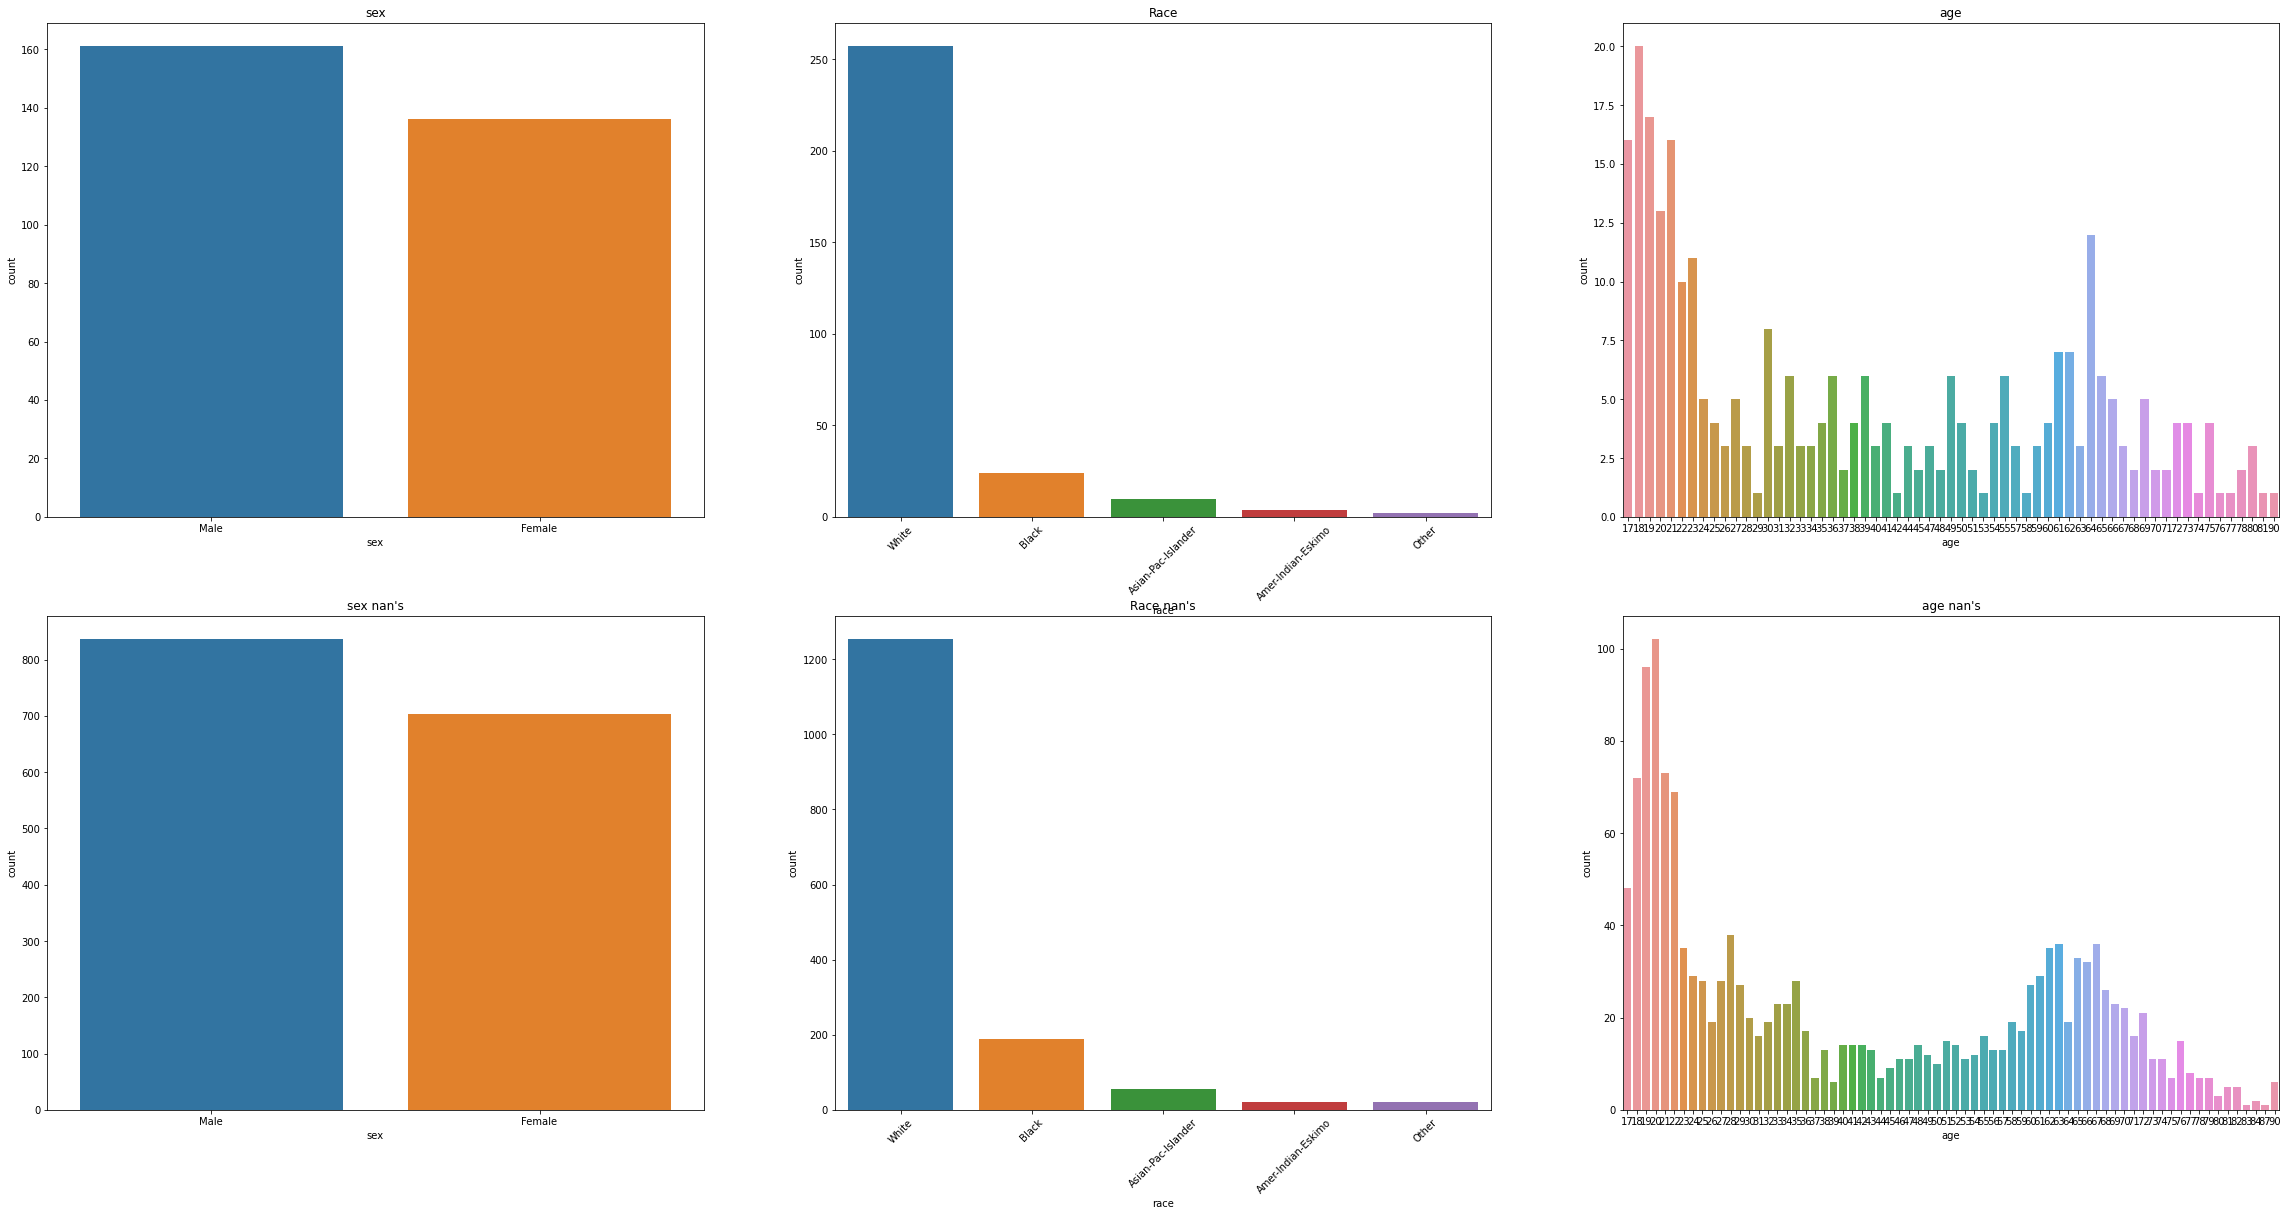

In [ ]:
#@title 
plt.figure(figsize=(40,20))



plt.subplot(231)
plt.title("sex")
sns.countplot(test.loc[test.workclass.isna()]['sex'], order=test.sex.value_counts(ascending=False).index)

plt.subplot(232)
plt.title("Race")
sns.countplot(test.loc[test.workclass.isna()].race,order=test.race.value_counts(ascending=False).index)
plt.xticks(rotation=45)

plt.subplot(233)
plt.title('age')
sns.countplot(test.loc[test.workclass.isna()]['age'])



plt.subplot(234)
plt.title("sex nan's")
sns.countplot(df.loc[df.workclass.isna()]['sex'], order=df.sex.value_counts(ascending=False).index)

plt.subplot(235)
plt.title("Race nan's")
sns.countplot(df.loc[df.workclass.isna()].race,order=df.race.value_counts(ascending=False).index)
plt.xticks(rotation=45)

plt.subplot(236)
plt.title("age nan's")
sns.countplot(df.loc[df.workclass.isna()]['age'],)


plt.show()

##Procesamiento de los datos de test

###Horas

In [ ]:
test1=test=pd.read_csv(test_path,index_col='ID')
# Se decide tratar los nans como una categoria mas ya que no influyen de esta manera tanto en el rendimiento del modelo !

In [ ]:
test1['horas']=test1['hours.per.week'].copy()

In [ ]:
test1.loc[test1.horas<45,'horas']=0

In [ ]:
test1.loc[test1.horas>=45,'horas']=1

In [ ]:
test1.horas.value_counts()

0    3572
1    1309
Name: horas, dtype: int64

###Edad

In [ ]:
test1['edad']=test1['age'].copy()

In [ ]:
test1.loc[(test1.age> 0)&(test1.age<=25),'edad']=1

In [ ]:
test1.loc[(test1.age>25)&(test1.age<=35),'edad']=2

In [ ]:
test1.loc[(test1.age> 35)&(test1.age<=90),'edad']=3

In [ ]:
test1.edad.value_counts()

3    2637
2    1287
1     957
Name: edad, dtype: int64

###sex

In [ ]:
test1['sex_Male']=test1['sex'].copy()

In [ ]:
test1.loc[test1['sex_Male'].isin(['Male']),'sex_Male']=1

In [ ]:
test1.loc[test1['sex_Male'].isin(['Female']),'sex_Male']=0

In [ ]:
test1.sex_Male.unique()

array([1, 0], dtype=object)

###Workclass

In [ ]:
#workclass
test1['trabajos']=test1['workclass']
test1.trabajos.unique()
test1.loc[test1['trabajos'].isin(['Self-emp-inc']),'trabajos']=3
test1.loc[test1['trabajos'].isin(['Local-gov','Federal-gov','State-gov']),'trabajos']=2
test1.loc[test1['trabajos'].isin(['Private','Self-emp-not-inc','Without-pay']),'trabajos']=1
test1.loc[test1['trabajos'].isin(['?','Never-worked']),'trabajos']=0
contrabajo=['trabajos','horas','edad','gainmas7000','education.num','sex_Male','relationship_Not-in-family', 'relationship_Other-relative','relationship_Own-child','relationship_Unmarried',	'relationship_Wife']
test1.trabajos.unique()


array([1, 0, 3, 2], dtype=object)

###occupation

In [ ]:
#Occupation

test1.occupation.unique()

test1['ocupa']=test1['occupation']

test1.head()

test1.ocupa

test1.loc[test1.ocupa.isin(['Exec-managerial','Prof-specialty']),'ocupa']=3

test1.loc[test1['ocupa'].isin(['Tech-support','Protective-serv']),'ocupa']=2

test1.loc[test1['ocupa'].isin(['Craft-repair','Other-service','Transport-moving','Adm-clerical','Farming-fishing','Handlers-cleaners','Sales','Priv-house-serv','Armed-Forces','Machine-op-inspct']),'ocupa']=1

test1.loc[test1['ocupa'].isin(['?']),'ocupa']=0

test1.ocupa.unique()

array([1, 0, 3, 2], dtype=object)

###Relationship

In [ ]:
test1.relationship.unique()
test1['relaciones']=test1['relationship']
test1.loc[test1['relationship'].isin(['Wife','Husband']),'relaciones']=1
test1.loc[test1['relationship'].isin(['Own-child','Not-in-family','Unmarried','Other-relative']),'relaciones']=0
test1.relaciones.unique()

array([1, 0], dtype=object)

In [ ]:
test1.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,horas,edad,sex_Male,trabajos,ocupa,relaciones
ID,,,,,,,,,,,,,,,,,,,,
3643,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,0,3,1,1,1,1
16036,16041,18,?,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,0,1,1,0,0,0
9401,9403,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,0,3,0,1,1,1
17903,17909,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,1,3,1,3,3,1
5198,5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,0,3,0,2,3,1


### Marital status

In [ ]:
#matrial status



test1['estado_civ']=test1['marital.status']

test1.loc[test1['estado_civ'].isin(['Married-civ-spouse']),'estado_civ']=1
          
test1.loc[test1['estado_civ'].isin(['Divorced','Never-married', 'Widowed','Separated', 'Married-spouse-absent', 'Married-AF-spouse']),'estado_civ']=0

test1.estado_civ.value_counts()

0    2631
1    2250
Name: estado_civ, dtype: int64

##Modelo completo

In [ ]:
X.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,horas,gainmas7000,edad,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,trabajos,ocupa,estado_civ,relaciones,horas_1,edad_2,edad_3,gainmas7000_1,education.num_2,education.num_3,education.num_4,education.num_5,education.num_6,education.num_7,education.num_8,education.num_9,education.num_10,education.num_11,education.num_12,education.num_13,education.num_14,education.num_15,education.num_16,trabajos_2,trabajos_3,ocupa_2,ocupa_3,estado_civ_1,relaciones_1,native_country
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24451,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,0,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
30229,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,3,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
27639,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
y.head()

ID
24451    0.0
985      1.0
30229    1.0
7107     1.0
27639    0.0
Name: income_>50K, dtype: float64

In [ ]:
tree4=DecisionTreeClassifier(random_state=6,max_depth=7)
tree4.fit(X[elementosproc1+elementosproc2],y)

print(f1_score(y,tree4.predict(X[elementosproc1+elementosproc2]),average='macro'))



0.7929322864450299


In [ ]:
predicciones=tree4.predict(test1[elementosproc1+elementosproc2])

In [ ]:
sumbit=pd.DataFrame(predicciones,columns=['PRED'],index=test1.index)

In [ ]:
test1.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,horas,edad,sex_Male,trabajos,ocupa,relaciones,estado_civ
ID,,,,,,,,,,,,,,,,,,,,,
3643,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,0,3,1,1,1,1,1
16036,16041,18,?,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,0,1,1,0,0,0,0
9401,9403,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,0,3,0,1,1,1,1
17903,17909,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,1,3,1,3,3,1,1
5198,5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,0,3,0,2,3,1,1


In [ ]:
sumbit.head(5)

,PRED
ID,
3643,0.0
16036,0.0
9401,0.0
17903,1.0
5198,1.0


In [ ]:
sumbit.to_csv('submit_example.csv')